In [1]:
# --- 0. IMPORTAR LIBRERÍAS Y CONFIGURACIÓN INICIAL ---
print("0. Iniciando el script completo...")
import pandas as pd
import yfinance as yf
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings # Librería para gestionar advertencias

# --- CAMBIO CLAVE AQUÍ: SUPRESIÓN DE ADVERTENCIAS MÁS AMPLIA Y POR MENSAJE ---
warnings.filterwarnings("ignore") # Ignorar todas las advertencias (general)
warnings.filterwarnings('ignore', message=".*DataFrame is highly fragmented.*", category=UserWarning) # Específica por mensaje
# --- Fin supresión de advertencias ---

# --- 0.1. DEFINICIÓN DE VARIABLES GLOBALES (Fechas, Rutas, Listas de Tickers) ---
# ... (resto de tu código del script completo) ...

0. Iniciando el script completo...


In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='pandas')

In [3]:
import os

# Define la ruta de la carpeta donde guardaste los archivos .xlsx del S&P 500
folder_path_sp500 = 'datos_sp500/' 

# Obtener la ruta del directorio de trabajo actual donde se está ejecutando el cuaderno
current_working_directory = os.getcwd()
print(f"El cuaderno se está ejecutando en el directorio: {current_working_directory}")

# Listar el contenido de ese directorio para ver si 'datos_sp500' aparece
print("\nContenido del directorio actual:")
print(os.listdir(current_working_directory))

# Listar el contenido de la carpeta 'datos_sp500' directamente
print(f"\nContenido de la carpeta '{folder_path_sp500}' (según el código):")
try:
    print(os.listdir(folder_path_sp500))
except FileNotFoundError:
    print(f"ERROR: La carpeta '{folder_path_sp500}' no fue encontrada en '{current_working_directory}'")

print("\n--- Diagnóstico de rutas completado. ---")

El cuaderno se está ejecutando en el directorio: C:\Users\Augusto\TESIS

Contenido del directorio actual:
[' Tesis sp500.ipynb', ' Tesis_sp500.ipynb', '.ipynb_checkpoints', 'Abnormal_Volume_Comparison.png', 'CSAD_Comparison.png', 'CSI300_AbnormalVol_Regression.png', 'CSI300_Correlation_Matrix.png', 'CSI300_CSAD_Regression.png', 'CSI300_CSSD_Regression.png', 'CSI300_Descriptive_Stats.png', 'CSI300_Turnover_Regression.png', 'CSSD_Comparison.png', 'datos_csi300', 'datos_fx', 'datos_sp500', 'SP500_AbnormalVol_Regression.png', 'SP500_Correlation_Matrix.png', 'SP500_CSAD_Regression.png', 'SP500_CSSD_Regression.png', 'SP500_Descriptive_Stats.png', 'SP500_Turnover_Regression.png', 'Turnover_Comparison.png', 'Untitled.ipynb']

Contenido de la carpeta 'datos_sp500/' (según el código):
['AAPL.csv.xlsx', 'ABBV.csv.xlsx', 'ADM.csv.xlsx', 'AMZN.csv.xlsx', 'AVGO.csv.xlsx', 'BAC.csv.xlsx', 'BRK-B.csv.xlsx', 'COST.csv.xlsx', 'CRM.csv.xlsx', 'CVX.csv.xlsx', 'GOOGL.csv.xlsx', 'HD.csv.xlsx', 'JNJ.csv.xlsx

In [4]:
# Actualizar la librería openpyxl
print("Actualizando openpyxl...")
!pip install --upgrade openpyxl
print("openpyxl actualizado. ¡Continuamos!")

Actualizando openpyxl...
openpyxl actualizado. ¡Continuamos!


In [5]:
# --- PASO 3: CARGAR DATOS DEL S&P 500 DESDE ARCHIVOS .XLSX ---

import os
import pandas as pd

folder_path_sp500 = 'datos_sp500/'

all_sp500_data = []

print(f"Cargando archivos desde: {folder_path_sp500}")

for filename in os.listdir(folder_path_sp500):
    if filename.endswith(".csv.xlsx"): # Asegúrate que esta es la extensión real (ej. "AAPL.csv.xlsx")
        ticker = filename.replace('.csv.xlsx', '') 
        filepath = os.path.join(folder_path_sp500, filename) 

        print(f"Cargando {filename} (Ticker: {ticker})...")
        try:
            df_temp = pd.read_excel(filepath)

            # --- NUEVO CÓDIGO AQUÍ: Función para limpiar y convertir volumen ---
            def clean_volume(vol_str):
                if isinstance(vol_str, (int, float)): # Si ya es un número (raro en este caso), devolverlo
                    return vol_str
                vol_str = str(vol_str).strip() # Asegurarse de que es string y quitar espacios
                if 'M' in vol_str:
                    # Reemplaza 'M' y convierte a float, luego multiplica por 1 millón
                    return float(vol_str.replace('M', '')) * 1_000_000
                elif 'B' in vol_str:
                    # Reemplaza 'B' y convierte a float, luego multiplica por 1 billón
                    return float(vol_str.replace('B', '')) * 1_000_000_000
                elif 'K' in vol_str:
                    # Reemplaza 'K' y convierte a float, luego multiplica por 1 mil
                    return float(vol_str.replace('K', '')) * 1_000
                return float(vol_str) # Para números sin sufijo (ej. '12345')

            # Aplicar la función de limpieza a la columna 'Vol.'
            # Se verifica si la columna 'Vol.' existe antes de aplicarle la limpieza
            if 'Vol.' in df_temp.columns:
                df_temp['Vol.'] = df_temp['Vol.'].apply(clean_volume)
            else:
                print(f"  Advertencia: Columna 'Vol.' no encontrada en {filename}. Verifique el nombre de la columna en el archivo Excel.")
            # --- FIN DEL NUEVO CÓDIGO ---

            df_temp['Date'] = pd.to_datetime(df_temp['Date'])
            df_temp = df_temp.set_index('Date')

            df_temp = df_temp[['Price', 'Vol.']].rename(columns={'Price': 'Adj Close', 'Vol.': 'Volume'})

            df_temp.columns = [f'{ticker}_{col}' for col in df_temp.columns]

            all_sp500_data.append(df_temp)

        except Exception as e:
            print(f"ERROR crítico al cargar o procesar el archivo {filename}: {e}")

if all_sp500_data:
    df_sp500_final = pd.concat(all_sp500_data, axis=1)
    print("\nDataFrame consolidado del S&P 500 creado. Primeras filas:")
    print(df_sp500_final.head())
    print(f"\nNúmero total de columnas en el DataFrame consolidado: {df_sp500_final.shape[1]} (debería ser 2 * número de tickers)")
    print(f"Número total de filas (días) en el DataFrame consolidado: {df_sp500_final.shape[0]}")
else:
    df_sp500_final = pd.DataFrame()
    print("No se encontraron archivos .xlsx válidos en la carpeta especificada.")

print("\nVerificación de valores NaN en el DataFrame consolidado del S&P 500:")
total_nan_sp500 = df_sp500_final.isnull().sum().sum()
print(f"Total de valores NaN en el DataFrame consolidado: {total_nan_sp500}")

print("\n¡Datos del S&P 500 cargados y consolidados exitosamente en df_sp500_final! Listos para el siguiente paso: Shares Outstanding y Cálculos de Sesgos.")

Cargando archivos desde: datos_sp500/
Cargando AAPL.csv.xlsx (Ticker: AAPL)...
Cargando ABBV.csv.xlsx (Ticker: ABBV)...
Cargando ADM.csv.xlsx (Ticker: ADM)...
Cargando AMZN.csv.xlsx (Ticker: AMZN)...
Cargando AVGO.csv.xlsx (Ticker: AVGO)...
Cargando BAC.csv.xlsx (Ticker: BAC)...
Cargando BRK-B.csv.xlsx (Ticker: BRK-B)...
Cargando COST.csv.xlsx (Ticker: COST)...
Cargando CRM.csv.xlsx (Ticker: CRM)...
Cargando CVX.csv.xlsx (Ticker: CVX)...
Cargando GOOGL.csv.xlsx (Ticker: GOOGL)...
Cargando HD.csv.xlsx (Ticker: HD)...
Cargando JNJ.csv.xlsx (Ticker: JNJ)...
Cargando JPM.csv.xlsx (Ticker: JPM)...
Cargando KO.csv.xlsx (Ticker: KO)...
Cargando LLY.csv.xlsx (Ticker: LLY)...
Cargando MA.csv.xlsx (Ticker: MA)...
Cargando MCD.csv.xlsx (Ticker: MCD)...
Cargando META.csv.xlsx (Ticker: META)...
Cargando MRK.csv.xlsx (Ticker: MRK)...
Cargando MSFT.csv.xlsx (Ticker: MSFT)...
Cargando NVDA.csv.xlsx (Ticker: NVDA)...
Cargando ORCL.csv.xlsx (Ticker: ORCL)...
Cargando PEP.csv.xlsx (Ticker: PEP)...
Cargan

In [6]:
print("Nombres de las columnas en df_sp500_final:")
print(df_sp500_final.columns)

print("\nPrimeras filas de df_sp500_final (para confirmar los nombres de las columnas):")
print(df_sp500_final.head())

Nombres de las columnas en df_sp500_final:
Index(['AAPL_Adj Close', 'AAPL_Volume', 'ABBV_Adj Close', 'ABBV_Volume',
       'ADM_Adj Close', 'ADM_Volume', 'AMZN_Adj Close', 'AMZN_Volume',
       'AVGO_Adj Close', 'AVGO_Volume', 'BAC_Adj Close', 'BAC_Volume',
       'BRK-B_Adj Close', 'BRK-B_Volume', 'COST_Adj Close', 'COST_Volume',
       'CRM_Adj Close', 'CRM_Volume', 'CVX_Adj Close', 'CVX_Volume',
       'GOOGL_Adj Close', 'GOOGL_Volume', 'HD_Adj Close', 'HD_Volume',
       'JNJ_Adj Close', 'JNJ_Volume', 'JPM_Adj Close', 'JPM_Volume',
       'KO_Adj Close', 'KO_Volume', 'LLY_Adj Close', 'LLY_Volume',
       'MA_Adj Close', 'MA_Volume', 'MCD_Adj Close', 'MCD_Volume',
       'META_Adj Close', 'META_Volume', 'MRK_Adj Close', 'MRK_Volume',
       'MSFT_Adj Close', 'MSFT_Volume', 'NVDA_Adj Close', 'NVDA_Volume',
       'ORCL_Adj Close', 'ORCL_Volume', 'PEP_Adj Close', 'PEP_Volume',
       'PG_Adj Close', 'PG_Volume', 'TSLA_Adj Close', 'TSLA_Volume',
       'UNH_Adj Close', 'UNH_Volume', 'V

In [7]:
# --- PASO 4: OBTENER SHARES OUTSTANDING PARA S&P 500 ---

# Asegúrate de que las librerías necesarias estén importadas
import pandas as pd
import yfinance as yf
import time # Para las pausas

# Lista de tickers del S&P 500 (debe ser la misma que usaste para descargar los datos)
tickers_sp500 = [
    "AAPL", "MSFT", "NVDA", "GOOGL", "AMZN", "META", "BRK-B", "LLY", "TSLA", "V",
    "JPM", "XOM", "UNH", "JNJ", "WMT", "MA", "PG", "AVGO", "HD", "CVX",
    "MRK", "ABBV", "COST", "ORCL", "KO", "PEP", "BAC", "MCD", "CRM", "ADM"
]

shares_outstanding_sp500 = {}
print("Iniciando obtención de Shares Outstanding para S&P 500...")

for ticker_symbol in tickers_sp500:
    print(f"Obteniendo Shares Outstanding para {ticker_symbol}...")
    try:
        # Crea un objeto Ticker para acceder a la información de la empresa
        ticker_yf_obj = yf.Ticker(ticker_symbol)
        
        # Intenta obtener Shares Outstanding de diferentes campos comunes
        # yf.info es un diccionario que contiene mucha información fundamental
        so = ticker_yf_obj.info.get('sharesOutstanding', None)
        if so is None:
            so = ticker_yf_obj.info.get('currentSharesOutstanding', None)
        if so is None:
            so = ticker_yf_obj.info.get('floatShares', None) # A veces está como floatShares

        shares_outstanding_sp500[ticker_symbol] = so
        
        if so is None:
            print(f"  Advertencia: Shares Outstanding NO ENCONTRADO para {ticker_symbol}. Se usará None.")
        
        time.sleep(1) # Pausa de 1 segundo para evitar saturar el servidor

    except Exception as e:
        shares_outstanding_sp500[ticker_symbol] = None
        print(f"  ERROR al obtener Shares Outstanding para {ticker_symbol}: {e}. Se usará None.")

print("\nObtención de Shares Outstanding completada para S&P 500.")
print("Primeras 5 acciones con Shares Outstanding obtenido:")
# Filtra y muestra solo los primeros 5 tickers para los que se obtuvo el dato
print({k: v for k, v in list(shares_outstanding_sp500.items())[:5] if v is not None})

print("\n¡Shares Outstanding del S&P 500 listo! Lo tenemos en el diccionario 'shares_outstanding_sp500'.")

Iniciando obtención de Shares Outstanding para S&P 500...
Obteniendo Shares Outstanding para AAPL...
Obteniendo Shares Outstanding para MSFT...
Obteniendo Shares Outstanding para NVDA...
Obteniendo Shares Outstanding para GOOGL...
Obteniendo Shares Outstanding para AMZN...
Obteniendo Shares Outstanding para META...
Obteniendo Shares Outstanding para BRK-B...
Obteniendo Shares Outstanding para LLY...
Obteniendo Shares Outstanding para TSLA...
Obteniendo Shares Outstanding para V...
Obteniendo Shares Outstanding para JPM...
Obteniendo Shares Outstanding para XOM...
Obteniendo Shares Outstanding para UNH...
Obteniendo Shares Outstanding para JNJ...
Obteniendo Shares Outstanding para WMT...
Obteniendo Shares Outstanding para MA...
Obteniendo Shares Outstanding para PG...
Obteniendo Shares Outstanding para AVGO...
Obteniendo Shares Outstanding para HD...
Obteniendo Shares Outstanding para CVX...
Obteniendo Shares Outstanding para MRK...
Obteniendo Shares Outstanding para ABBV...
Obteniendo 

In [8]:
# --- Verificar el diccionario completo de Shares Outstanding ---

# Imprimir el diccionario completo para ver qué valores son None
print("Diccionario completo de Shares Outstanding (S&P 500):")
print(shares_outstanding_sp500)

# Contar cuántos tickers tienen Shares Outstanding (no son None)
num_found_so = sum(1 for v in shares_outstanding_sp500.values() if v is not None)
num_total_tickers = len(shares_outstanding_sp500)

print(f"\nSe encontraron Shares Outstanding para {num_found_so} de {num_total_tickers} tickers del S&P 500.")

if num_found_so < num_total_tickers:
    missing_so_tickers = [k for k, v in shares_outstanding_sp500.items() if v is None]
    print(f"Tickers con Shares Outstanding faltante: {missing_so_tickers}")

Diccionario completo de Shares Outstanding (S&P 500):
{'AAPL': 14935799808, 'MSFT': 7432540160, 'NVDA': 24387600384, 'GOOGL': 5820000256, 'AMZN': 10616399872, 'META': 2171150080, 'BRK-B': 1342840064, 'LLY': 897736000, 'TSLA': 3220960000, 'V': 1710989952, 'JPM': 2779089920, 'XOM': 4309640192, 'UNH': 907139968, 'JNJ': 2406070016, 'WMT': 7980420096, 'MA': 901262976, 'PG': 2344539904, 'AVGO': 4703470080, 'HD': 994928000, 'CVX': 1732230016, 'MRK': 2511030016, 'ABBV': 1766400000, 'COST': 443476992, 'ORCL': 2808829952, 'KO': 4304269824, 'PEP': 1371079936, 'BAC': 7531879936, 'MCD': 715033024, 'CRM': 956000000, 'ADM': 480449984}

Se encontraron Shares Outstanding para 30 de 30 tickers del S&P 500.


In [9]:
# --- PASO 5: CALCULAR CAPITALIZACIÓN BURSÁTIL Y RETORNOS DIARIOS (para S&P 500) ---

print("Calculando Capitalización Bursátil y Retornos Diarios para S&P 500...")

# Crear una lista de los tickers que realmente se cargaron en df_sp500_final
loaded_tickers_sp500 = [col.split('_')[0] for col in df_sp500_final.columns if col.endswith('_Adj Close')]
loaded_tickers_sp500 = list(set(loaded_tickers_sp500)) # Eliminar duplicados si los hubiera

# 1. Crear columnas de Capitalización Bursátil (Market Cap)
for ticker in loaded_tickers_sp500:
    adj_close_col = f'{ticker}_Adj Close'
    market_cap_col = f'{ticker}_MarketCap'

    if adj_close_col in df_sp500_final.columns:
        if ticker in shares_outstanding_sp500 and shares_outstanding_sp500[ticker] is not None:
            df_sp500_final[market_cap_col] = df_sp500_final[adj_close_col] * shares_outstanding_sp500[ticker]
        else:
            df_sp500_final[market_cap_col] = np.nan # Asignar NaN si Shares Outstanding no está
    else:
        df_sp500_final[market_cap_col] = np.nan


# 2. Calcular Retornos Diarios para cada acción
for ticker in loaded_tickers_sp500:
    adj_close_col = f'{ticker}_Adj Close'
    return_col = f'{ticker}_Return'
    if adj_close_col in df_sp500_final.columns:
        df_sp500_final[return_col] = df_sp500_final[adj_close_col].pct_change()
    else:
        df_sp500_final[return_col] = np.nan

# 3. Calcular Retorno Promedio Diario del Índice (Necesario para CSSD/CSAD)
return_columns = [col for col in df_sp500_final.columns if col.endswith('_Return')]
if return_columns:
    df_sp500_final['Index_Daily_Return_Avg'] = df_sp500_final[return_columns].mean(axis=1)
else:
    df_sp500_final['Index_Daily_Return_Avg'] = np.nan

print("\nCálculo de Capitalización Bursátil y Retornos Diarios completado para S&P 500.")
print("Primeras filas del DataFrame con las nuevas columnas:")

# Muestra solo algunas columnas relevantes para no saturar la salida
sample_tickers = [t for t in loaded_tickers_sp500 if t in shares_outstanding_sp500 and shares_outstanding_sp500[t] is not None][:2]

if sample_tickers:
    sample_cols = []
    for t in sample_tickers:
        sample_cols.extend([f'{t}_Adj Close', f'{t}_MarketCap', f'{t}_Volume', f'{t}_Return'])
    sample_cols.append('Index_Daily_Return_Avg')
    
    existing_sample_cols = [col for col in sample_cols if col in df_sp500_final.columns]
    print(df_sp500_final[existing_sample_cols].head())
else:
    print("No hay tickers válidos para mostrar en la muestra, posiblemente por falta de Shares Outstanding.")


print("\n¡DataFrame df_sp500_final actualizado con MarketCap y Retornos! Listos para los sesgos.")

Calculando Capitalización Bursátil y Retornos Diarios para S&P 500...

Cálculo de Capitalización Bursátil y Retornos Diarios completado para S&P 500.
Primeras filas del DataFrame con las nuevas columnas:
            PEP_Adj Close  PEP_MarketCap  PEP_Volume  PEP_Return  \
Date                                                               
2024-12-31         152.06   2.084864e+11   4270000.0         NaN   
2024-12-30         151.72   2.080202e+11   5400000.0   -0.002236   
2024-12-27         152.89   2.096244e+11   4290000.0    0.007712   
2024-12-26         152.44   2.090074e+11   5530000.0   -0.002943   
2024-12-24         152.81   2.095147e+11   3400000.0    0.002427   

            JNJ_Adj Close  JNJ_MarketCap  JNJ_Volume  JNJ_Return  \
Date                                                               
2024-12-31         144.62   3.479658e+11   5810000.0         NaN   
2024-12-30         143.34   3.448861e+11   6270000.0   -0.008851   
2024-12-27         145.05   3.490005e+11   5590

In [10]:
# --- PASO 6: CALCULAR SESGOS (CSSD, CSAD, Volumen Anormal, Rotación de Cartera) para S&P 500 ---

print("Iniciando cálculo de sesgos para S&P 500...")

# 1. Calcular CSSD y CSAD (Herding)
# Recorrer solo las columnas de retornos individuales
individual_returns_cols = [col for col in df_sp500_final.columns if col.endswith('_Return') and col != 'Index_Daily_Return_Avg']

# Asegurarse de que el Index_Daily_Return_Avg existe y no está vacío
if 'Index_Daily_Return_Avg' in df_sp500_final.columns and not df_sp500_final['Index_Daily_Return_Avg'].isnull().all():
    # Calcular la diferencia de cada retorno individual respecto al promedio del índice
    diff_from_avg = df_sp500_final[individual_returns_cols].sub(df_sp500_final['Index_Daily_Return_Avg'], axis=0)

    # Calcular CSSD: Desviación estándar de las diferencias
    # CAMBIO CLAVE AQUÍ: Se usa 'diff_from_avg'
    df_sp500_final['CSSD_SP500'] = diff_from_avg.std(axis=1, ddof=0)

    # Calcular CSAD: Promedio de las desviaciones absolutas
    # CAMBIO CLAVE AQUÍ: Se usa 'diff_from_avg'
    df_sp500_final['CSAD_SP500'] = diff_from_avg.abs().mean(axis=1)

    print("  CSSD y CSAD (Herding) calculados.")
else:
    print("  Advertencia: 'Index_Daily_Return_Avg' no disponible o vacío. No se calcularán CSSD ni CSAD.")
    df_sp500_final['CSSD_SP500'] = np.nan
    df_sp500_final['CSAD_SP500'] = np.nan


# 2. Calcular Volumen Anormal y Rotación de Cartera (Sobreconfianza)
# Se necesitan las columnas de volumen y market cap individuales
# Y el MarketCap ya calculado en el Paso 5

# Definir un período para el promedio móvil del volumen (ej. 20 días hábiles)
rolling_period = 20 

# Crear una lista de los tickers para los que tenemos datos de volumen y MarketCap
tickers_with_data = [col.split('_')[0] for col in df_sp500_final.columns if col.endswith('_Volume')]
tickers_with_data = list(set(tickers_with_data)) # Eliminar duplicados

for ticker in tickers_with_data: # Iterar sobre los tickers que se cargaron exitosamente
    volume_col = f'{ticker}_Volume'
    market_cap_col = f'{ticker}_MarketCap'

    # Calcular Volumen Anormal
    if volume_col in df_sp500_final.columns and not df_sp500_final[volume_col].isnull().all():
        # Calcular el promedio móvil del volumen
        df_sp500_final[f'{ticker}_Volume_Avg_{rolling_period}D'] = df_sp500_final[volume_col].rolling(window=rolling_period).mean()
        # Volumen Anormal: (Volumen de hoy / Volumen Promedio Móvil) - 1
        df_sp500_final[f'{ticker}_Abnormal_Volume'] = (df_sp500_final[volume_col] / df_sp500_final[f'{ticker}_Volume_Avg_{rolling_period}D']) - 1
    else:
        print(f"  Advertencia: Columna '{volume_col}' no encontrada o vacía para {ticker}. No se calculará Volumen Anormal.")
        df_sp500_final[f'{ticker}_Abnormal_Volume'] = np.nan

    # Calcular Rotación de Cartera
    if volume_col in df_sp500_final.columns and market_cap_col in df_sp500_final.columns and \
       not df_sp500_final[volume_col].isnull().all() and not df_sp500_final[market_cap_col].isnull().all():
        # Rotación de Cartera = Volumen / MarketCap
        df_sp500_final[f'{ticker}_Turnover'] = df_sp500_final[volume_col] / df_sp500_final[market_cap_col]
    else:
        print(f"  Advertencia: Columnas '{volume_col}' o '{market_cap_col}' no encontradas o vacías para {ticker}. No se calculará Rotación de Cartera.")
        df_sp500_final[f'{ticker}_Turnover'] = np.nan

print("  Volumen Anormal y Rotación de Cartera calculados para cada acción.")

# Opcional: Calcular el promedio de Volumen Anormal y Rotación de Cartera a nivel de índice
abnormal_volume_cols = [col for col in df_sp500_final.columns if col.endswith('_Abnormal_Volume')]
turnover_cols = [col for col in df_sp500_final.columns if col.endswith('_Turnover')]

if abnormal_volume_cols:
    df_sp500_final['Index_Abnormal_Volume_Avg'] = df_sp500_final[abnormal_volume_cols].mean(axis=1)
else:
    df_sp500_final['Index_Abnormal_Volume_Avg'] = np.nan

if turnover_cols:
    df_sp500_final['Index_Turnover_Avg'] = df_sp500_final[turnover_cols].mean(axis=1)
else:
    df_sp500_final['Index_Turnover_Avg'] = np.nan

print("\nCálculo de sesgos completado para S&P 500.")
print("Primeras filas del DataFrame con los nuevos indicadores agregados:")

# Muestra algunas columnas clave de los sesgos
cols_to_show = ['CSSD_SP500', 'CSAD_SP500', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
print(df_sp500_final[cols_to_show].head(10)) # Mostrar 10 para ver más datos


print("\n¡DataFrame df_sp500_final ahora contiene todos los indicadores de sesgos para el S&P 500!")

Iniciando cálculo de sesgos para S&P 500...
  CSSD y CSAD (Herding) calculados.
  Volumen Anormal y Rotación de Cartera calculados para cada acción.

Cálculo de sesgos completado para S&P 500.
Primeras filas del DataFrame con los nuevos indicadores agregados:
            CSSD_SP500  CSAD_SP500  Index_Abnormal_Volume_Avg  \
Date                                                            
2024-12-31         NaN         NaN                        NaN   
2024-12-30    0.010317    0.007613                        NaN   
2024-12-27    0.006423    0.004120                        NaN   
2024-12-26    0.010059    0.007013                        NaN   
2024-12-24    0.006715    0.004471                        NaN   
2024-12-23    0.012579    0.007136                        NaN   
2024-12-20    0.014792    0.011368                        NaN   
2024-12-19    0.013975    0.010467                        NaN   
2024-12-18    0.011760    0.009381                        NaN   
2024-12-17    0.020685   

In [11]:
# --- DEPURACIÓN: VERIFICAR COLUMNAS DE VOLUMEN ANORMAL INDIVIDUALES ---

print("Primeras 30 filas de las columnas de Volumen Anormal individuales:")

# Selecciona todas las columnas que terminan en '_Abnormal_Volume'
abnormal_volume_cols_check = [col for col in df_sp500_final.columns if col.endswith('_Abnormal_Volume')]

# Muestra las primeras 30 filas de esas columnas
# Si hay muchos tickers, puede que se corte la visualización.
print(df_sp500_final[abnormal_volume_cols_check].head(30))

print("\nVerificando si hay valores no-NaN después de las primeras 30 filas:")
# Muestra si alguna de estas columnas tiene valores no-NaN después de la fila 20
for col in abnormal_volume_cols_check:
    # Cuenta los NaN en toda la columna y la longitud total para ver si está completamente vacía
    nan_count = df_sp500_final[col].isnull().sum()
    total_rows = len(df_sp500_final)
    if nan_count < total_rows:
        print(f"  Columna '{col}': tiene {total_rows - nan_count} valores no-NaN.")
    else:
        print(f"  Columna '{col}': ¡ATENCIÓN! Está completamente llena de NaN.")

Primeras 30 filas de las columnas de Volumen Anormal individuales:
            PEP_Abnormal_Volume  JNJ_Abnormal_Volume  AAPL_Abnormal_Volume  \
Date                                                                         
2024-12-31                  NaN                  NaN                   NaN   
2024-12-30                  NaN                  NaN                   NaN   
2024-12-27                  NaN                  NaN                   NaN   
2024-12-26                  NaN                  NaN                   NaN   
2024-12-24                  NaN                  NaN                   NaN   
2024-12-23                  NaN                  NaN                   NaN   
2024-12-20                  NaN                  NaN                   NaN   
2024-12-19                  NaN                  NaN                   NaN   
2024-12-18                  NaN                  NaN                   NaN   
2024-12-17                  NaN                  NaN                   NaN 

In [12]:
# --- PASO 8: CARGAR DATOS DEL CSI 300 DESDE ARCHIVOS .XLSX CONSOLIDADOS ---

import os 
import pandas as pd 

# Define la ruta de la carpeta donde guardaste los archivos .xlsx del CSI 300
folder_path_csi300 = 'datos_csi300/'

all_csi300_data = [] # Lista para almacenar los DataFrames individuales de cada acción

print(f"Cargando archivos desde: {folder_path_csi300}")

for filename in os.listdir(folder_path_csi300):
    # Solo busca archivos .xlsx (ya no necesita la exclusión del FX porque ahora va en otra carpeta)
    if filename.endswith(".xlsx"): 
        ticker = filename.replace('.xlsx', '') 
        filepath = os.path.join(folder_path_csi300, filename) 
        
        print(f"Cargando {filename} (Ticker: {ticker})...")
        try:
            df_temp = pd.read_excel(filepath)

            df_temp['Date'] = pd.to_datetime(df_temp['Date'])
            df_temp = df_temp.set_index('Date')

            df_temp = df_temp[['Price', 'Vol.']].rename(columns={'Price': 'Adj Close', 'Vol.': 'Volume'})

            # Función para limpiar y convertir volumen (copiada desde el Paso 3)
            def clean_volume(vol_str):
                if isinstance(vol_str, (int, float)):
                    return vol_str
                vol_str = str(vol_str).strip()
                if 'M' in vol_str:
                    return float(vol_str.replace('M', '')) * 1_000_000
                elif 'B' in vol_str:
                    return float(vol_str.replace('B', '')) * 1_000_000_000
                elif 'K' in vol_str:
                    return float(vol_str.replace('K', '')) * 1_000
                return float(vol_str)

            if 'Volume' in df_temp.columns:
                df_temp['Volume'] = df_temp['Volume'].apply(clean_volume)
            else:
                print(f"  Advertencia: Columna 'Volume' no encontrada en {filename}. Verifique el nombre de la columna.")

            df_temp.columns = [f'{ticker}_{col}' for col in df_temp.columns]

            all_csi300_data.append(df_temp)

        except Exception as e:
            print(f"ERROR crítico al cargar o procesar el archivo {filename}: {e}")

if all_csi300_data:
    df_csi300_final = pd.concat(all_csi300_data, axis=1)
    print("\nDataFrame consolidado del CSI 300 creado. Primeras filas:")
    print(df_csi300_final.head())
    print(f"\nNúmero total de columnas en el DataFrame consolidado: {df_csi300_final.shape[1]} (debería ser 2 * número de tickers)")
    print(f"Número total de filas (días) en el DataFrame consolidado: {df_csi300_final.shape[0]}")
else:
    df_csi300_final = pd.DataFrame()
    print("No se encontraron archivos .xlsx válidos en la carpeta especificada.")

print("\nVerificación de valores NaN en el DataFrame consolidado del CSI 300:")
total_nan_csi300 = df_csi300_final.isnull().sum().sum()
print(f"Total de valores NaN en el DataFrame consolidado: {total_nan_csi300}")

print("\n¡Datos del CSI 300 cargados y consolidados exitosamente en df_csi300_final! Listos para el siguiente paso: Shares Outstanding y Tipos de Cambio.")

Cargando archivos desde: datos_csi300/
Cargando 000002.SZ.xlsx.xlsx (Ticker: 000002.SZ)...
Cargando 000333.SZ.xlsx.xlsx (Ticker: 000333.SZ)...
Cargando 000651.SZ.xlsx.xlsx (Ticker: 000651.SZ)...
Cargando 002415.SZ.xlsx.xlsx (Ticker: 002415.SZ)...
Cargando 002594.SZ.xlsx.xlsx (Ticker: 002594.SZ)...
Cargando 600000.SS.xlsx.xlsx (Ticker: 600000.SS)...
Cargando 600009.SS.xlsx.xlsx (Ticker: 600009.SS)...
Cargando 600019.SS.xlsx.xlsx (Ticker: 600019.SS)...
Cargando 600028.SS.xlsx.xlsx (Ticker: 600028.SS)...
Cargando 600050.SS.xlsx.xlsx (Ticker: 600050.SS)...
Cargando 600276.SS.xlsx.xlsx (Ticker: 600276.SS)...
Cargando 600519.SS.xlsx.xlsx (Ticker: 600519.SS)...
Cargando 600585.SS.xlsx.xlsx (Ticker: 600585.SS)...
Cargando 600703.SS.xlsx.xlsx (Ticker: 600703.SS)...
Cargando 600887.SS.xlsx.xlsx (Ticker: 600887.SS)...
Cargando 600999.SS.xlsx.xlsx (Ticker: 600999.SS)...
Cargando 601006.SS.xlsx.xlsx (Ticker: 601006.SS)...
Cargando 601088.SS.xlsx.xlsx (Ticker: 601088.SS)...
Cargando 601166.SS.xlsx.x

In [13]:
# --- PASO 9: OBTENER SHARES OUTSTANDING PARA CSI 300 ---


import pandas as pd
import yfinance as yf
import time # Para las pausas
import numpy as np # Necesario para np.nan, por si algún SO no se encuentra

# Lista de tickers del CSI 300 (ACTUALIZADA Y DEFINITIVA según tus archivos en 'datos_csi300')
tickers_csi300 = [
    "000002.SZ", "000333.SZ", "000651.SZ", "000858.SZ", "002415.SZ",
    "002594.SZ", "600000.SS", "600009.SS", "600019.SS", "600028.SS",
    "600030.SS", "600036.SS", "600050.SS", "600276.SS", "600519.SS",
    "600585.SS", "600703.SS", "600887.SS", "600999.SS", "601006.SS",
    "601088.SS", "601166.SS", "601288.SS", "601318.SS", "601398.SS",
    "601668.SS", "601857.SS", "601939.SS", "601988.SS", "603288.SS"
]

shares_outstanding_csi300 = {}
print("Iniciando obtención de Shares Outstanding para CSI 300...")

for ticker_symbol in tickers_csi300:
    print(f"Obteniendo Shares Outstanding para {ticker_symbol}...")
    try:
        ticker_yf_obj = yf.Ticker(ticker_symbol)
        
        # Intenta obtener Shares Outstanding de diferentes campos comunes
        so = ticker_yf_obj.info.get('sharesOutstanding', None)
        if so is None:
            so = ticker_yf_obj.info.get('currentSharesOutstanding', None)
        if so is None:
            so = ticker_yf_obj.info.get('floatShares', None)

        shares_outstanding_csi300[ticker_symbol] = so
        
        if so is None:
            print(f"  Advertencia: Shares Outstanding NO ENCONTRADO para {ticker_symbol}. Se usará None.")
        
        time.sleep(1) # Pausa de 1 segundo

    except Exception as e:
        shares_outstanding_csi300[ticker_symbol] = None
        print(f"  ERROR al obtener Shares Outstanding para {ticker_symbol}: {e}. Se usará None.")

print("\nObtención de Shares Outstanding completada para CSI 300.")

# Conteo y verificación final de Shares Outstanding
num_found_so = sum(1 for v in shares_outstanding_csi300.values() if v is not None)
num_total_tickers = len(shares_outstanding_csi300)

print(f"\nSe encontraron Shares Outstanding para {num_found_so} de {num_total_tickers} tickers del CSI 300.")

if num_found_so < num_total_tickers:
    missing_so_tickers = [k for k, v in shares_outstanding_csi300.items() if v is None]
    print(f"Tickers con Shares Outstanding faltante: {missing_so_tickers}")
else:
    print("¡Todos los tickers del CSI 300 tienen Shares Outstanding!") 

print("\n¡Shares Outstanding del CSI 300 listo! Lo tenemos en el diccionario 'shares_outstanding_csi300'.")

Iniciando obtención de Shares Outstanding para CSI 300...
Obteniendo Shares Outstanding para 000002.SZ...
Obteniendo Shares Outstanding para 000333.SZ...
Obteniendo Shares Outstanding para 000651.SZ...
Obteniendo Shares Outstanding para 000858.SZ...
Obteniendo Shares Outstanding para 002415.SZ...
Obteniendo Shares Outstanding para 002594.SZ...
Obteniendo Shares Outstanding para 600000.SS...
Obteniendo Shares Outstanding para 600009.SS...
Obteniendo Shares Outstanding para 600019.SS...
Obteniendo Shares Outstanding para 600028.SS...
Obteniendo Shares Outstanding para 600030.SS...
Obteniendo Shares Outstanding para 600036.SS...
Obteniendo Shares Outstanding para 600050.SS...
Obteniendo Shares Outstanding para 600276.SS...
Obteniendo Shares Outstanding para 600519.SS...
Obteniendo Shares Outstanding para 600585.SS...
Obteniendo Shares Outstanding para 600703.SS...
Obteniendo Shares Outstanding para 600887.SS...
Obteniendo Shares Outstanding para 600999.SS...
Obteniendo Shares Outstanding 

In [14]:
# --- PASO 9.1: VERIFICACIÓN DEL ARCHIVO USD_CNY_FX.XLSX (VERSIÓN ROBUSTA) ---

import os

# Define la ruta de la carpeta donde guardaste el archivo FX (ruta absoluta)
# ASEGÚRATE de que esta ruta sea CORRECTA y use DOBLE BARRA INVERTIDA
folder_path_fx = 'C:\\Users\\Augusto\\TESIS\\datos_fx\\' 

# Nombre esperado del archivo FX (lo buscaremos de forma flexible)
target_fx_filename_base = 'USD_CNY_FX' # Nombre base sin extensión

print(f"Verificando la existencia del archivo FX en: {folder_path_fx}")

found_fx_file = None
# Listar todos los archivos en la carpeta y buscar de forma flexible
for filename_in_folder in os.listdir(folder_path_fx):
    # Convertir a minúsculas para una comparación insensible a mayúsculas/minúsculas
    # y verificar si contiene el nombre base y alguna de las extensiones posibles
    if target_fx_filename_base.lower() in filename_in_folder.lower() and \
       (filename_in_folder.lower().endswith('.xlsx') or \
        filename_in_folder.lower().endswith('.csv') or \
        filename_in_folder.lower().endswith('.csv.xlsx')):
        
        found_fx_file = filename_in_folder # Guardar el nombre real encontrado
        break # Detener la búsqueda una vez que se encuentre
        
if found_fx_file:
    print(f"¡CONFIRMADO! El archivo FX se encontró: '{found_fx_file}'")
    print("Podemos continuar con el Paso 10.")
    # Si encontramos el archivo, guardamos su nombre exacto en una variable global
    # que usará el Paso 10
    global actual_fx_filename_found 
    actual_fx_filename_found = found_fx_file
else:
    print(f"¡ERROR! El archivo base '{target_fx_filename_base}' NO fue encontrado en la ruta esperada con las extensiones comunes.")
    print("Por favor, verifica:")
    print(f"1. Que el archivo esté en la carpeta: '{folder_path_fx}'")
    print(f"2. Que el nombre del archivo contenga 'USD_CNY_FX' y tenga extensiones como .xlsx, .csv o .csv.xlsx")
    print(f"   Archivos encontrados en la carpeta: {os.listdir(folder_path_fx)}")

print("\n--- Verificación de archivo FX completada. ---")

Verificando la existencia del archivo FX en: C:\Users\Augusto\TESIS\datos_fx\
¡CONFIRMADO! El archivo FX se encontró: 'USD_CNY_FX.csv'
Podemos continuar con el Paso 10.

--- Verificación de archivo FX completada. ---


In [15]:
# --- PASO 10.1: CARGAR TIPO DE CAMBIO USD/CNY en df_csi300_final ---

print("Cargando tipo de cambio USD/CNY y añadiéndolo a df_csi300_final...")

# Define la ruta de la carpeta donde guardaste el archivo FX (ruta absoluta)
# ¡ASEGÚRATE de que esta ruta sea CORRECTA y use DOBLE BARRA INVERTIDA!
folder_path_fx = 'C:\\Users\\Augusto\\TESIS\\datos_fx\\' # <-- ¡TU RUTA ABSOLUTA AQUÍ!

# Nombre esperado del archivo FX (confirmado: es .csv)
fx_filename = 'USD_CNY_FX.csv' 
fx_filepath = os.path.join(folder_path_fx, fx_filename)

try:
    # CAMBIO CLAVE AQUÍ: Usamos pd.read_csv con sep=';'
    df_usd_cny_fx = pd.read_csv(fx_filepath, sep=';') 

    # Nombres de las columnas de fecha y precio en tu CSV (confirmado: 'Date' y 'Price')
    date_col_name_fx = 'Date' 
    price_col_name_fx = 'Price' 

    # Convierte la columna de fecha a formato de fecha y la establece como índice
    df_usd_cny_fx[date_col_name_fx] = pd.to_datetime(df_usd_cny_fx[date_col_name_fx])
    df_usd_cny_fx = df_usd_cny_fx.set_index(date_col_name_fx)

    # Selecciona la columna de precio y la renombra a 'USD_CNY_FX'
    df_usd_cny_fx = df_usd_cny_fx[[price_col_name_fx]].rename(columns={price_col_name_fx: 'USD_CNY_FX'})

    print(f"Carga USD/CNY desde archivo '{fx_filename}' completada.")
except FileNotFoundError:
    print(f"ERROR: Archivo de tipo de cambio '{fx_filepath}' NO encontrado. La conversión a USD no será posible.")
    df_usd_cny_fx = pd.DataFrame(index=df_csi300_final.index, columns=['USD_CNY_FX'], data=np.nan)
except Exception as e:
    print(f"ERROR al cargar o procesar el archivo FX: {e}. La conversión a USD no será posible.")
    df_usd_cny_fx = pd.DataFrame(index=df_csi300_final.index, columns=['USD_CNY_FX'], data=np.nan)

df_csi300_final['USD_CNY_FX'] = df_usd_cny_fx['USD_CNY_FX'].reindex(df_csi300_final.index, method='ffill') 

print("\nColumna 'USD_CNY_FX' añadida a df_csi300_final. Primeras filas:")
print(df_csi300_final['USD_CNY_FX'].head())

print("\n--- Paso 10.1 completado. ---")

Cargando tipo de cambio USD/CNY y añadiéndolo a df_csi300_final...
Carga USD/CNY desde archivo 'USD_CNY_FX.csv' completada.

Columna 'USD_CNY_FX' añadida a df_csi300_final. Primeras filas:
Date
2018-01-02    6.4933
2018-01-03    6.5030
2018-01-06    6.4998
2018-01-08    6.4998
2018-01-11    6.4959
Name: USD_CNY_FX, dtype: float64

--- Paso 10.1 completado. ---


In [16]:
print(df_csi300_final['USD_CNY_FX'].head())
print(df_csi300_final['USD_CNY_FX'].isnull().sum())

Date
2018-01-02    6.4933
2018-01-03    6.5030
2018-01-06    6.4998
2018-01-08    6.4998
2018-01-11    6.4959
Name: USD_CNY_FX, dtype: float64
0


In [17]:
# --- PASO 10.2: CALCULAR CAPITALIZACIÓN BURSÁTIL (CNY y USD) para CSI 300 ---

print("Calculando Capitalización Bursátil (CNY y USD) para CSI 300...")

# Las listas de tickers y el diccionario de shares_outstanding deben venir de pasos anteriores.
# El DataFrame df_csi300_final y la columna 'USD_CNY_FX' también vienen de pasos anteriores.

# Obtener la lista de tickers que realmente se cargaron en df_csi300_final
loaded_tickers_csi300 = [col.split('_')[0] for col in df_csi300_final.columns if col.endswith('_Adj Close')]
loaded_tickers_csi300 = list(set(loaded_tickers_csi300)) # Eliminar duplicados

for ticker in loaded_tickers_csi300:
    adj_close_col = f'{ticker}_Adj Close'
    market_cap_cny_col = f'{ticker}_MarketCap_CNY'
    market_cap_usd_col = f'{ticker}_MarketCap_USD'

    # Asegurarse de que la columna Adj Close existe y no está completamente vacía para este ticker
    if adj_close_col in df_csi300_final.columns and not df_csi300_final[adj_close_col].isnull().all():
        # Asegurarse de que Shares Outstanding existe y no es None para este ticker
        if ticker in shares_outstanding_csi300 and shares_outstanding_csi300[ticker] is not None:
            # CAMBIO CLAVE AQUÍ: Conversión de SO a float para evitar TypeError
            so_value = float(shares_outstanding_csi300[ticker]) # Forzar la conversión a flotante
            df_csi300_final[market_cap_cny_col] = df_csi300_final[adj_close_col] * so_value
            
            # Convertir a Market Cap en USD (DIVIDIMOS por el tipo de cambio USD/CNY)
            # Asegurarse de que la columna 'USD_CNY_FX' exista y no esté vacía
            if 'USD_CNY_FX' in df_csi300_final.columns and not df_csi300_final['USD_CNY_FX'].isnull().all():
                df_csi300_final[market_cap_usd_col] = df_csi300_final[market_cap_cny_col] / df_csi300_final['USD_CNY_FX']
            else:
                print(f"Advertencia: Tipo de cambio USD/CNY no disponible. '{market_cap_usd_col}' se llenará con NaN.")
                df_csi300_final[market_cap_usd_col] = np.nan
        else:
            print(f"Advertencia: Shares Outstanding no disponible para {ticker}. '{market_cap_cny_col}' y '{market_cap_usd_col}' se llenarán con NaN.")
            df_csi300_final[market_cap_cny_col] = np.nan
            df_csi300_final[market_cap_usd_col] = np.nan
    else:
        print(f"Advertencia: Columna '{adj_close_col}' no encontrada o vacía para {ticker}. No se calcularán MarketCap.")
        df_csi300_final[market_cap_cny_col] = np.nan
        df_csi300_final[market_cap_usd_col] = np.nan

# 3. Calcular Retornos Diarios para cada acción (CNY)
for ticker in loaded_tickers_csi300:
    adj_close_col = f'{ticker}_Adj Close'
    return_col = f'{ticker}_Return'
    if adj_close_col in df_csi300_final.columns and not df_csi300_final[adj_close_col].isnull().all():
        df_csi300_final[return_col] = df_csi300_final[adj_close_col].pct_change()
    else:
        print(f"Advertencia: Columna '{adj_close_col}' no encontrada o vacía para {ticker}. No se calcularán '{return_col}'.")
        df_csi300_final[return_col] = np.nan

# 4. Calcular Retorno Promedio Diario del Índice (Necesario para CSSD/CSAD)
return_columns_csi300 = [col for col in df_csi300_final.columns if col.endswith('_Return') and col != 'Index_Daily_Return_Avg']
if return_columns_csi300 and not df_csi300_final[return_columns_csi300].isnull().all().all():
    df_csi300_final['Index_Daily_Return_Avg'] = df_csi300_final[return_columns_csi300].mean(axis=1)
else:
    print("Advertencia: No hay retornos individuales válidos para calcular 'Index_Daily_Return_Avg'. Se llenará con NaN.")
    df_csi300_final['Index_Daily_Return_Avg'] = np.nan


print("\nCálculo de Capitalización Bursátil y Retornos Diarios completado para CSI 300.")
print("Primeras filas del DataFrame con las nuevas columnas:")

# Muestra algunas columnas relevantes para no saturar la salida
sample_tickers_csi = [t for t in loaded_tickers_csi300 if t in shares_outstanding_csi300 and shares_outstanding_csi300[t] is not None][:2]

if sample_tickers_csi:
    sample_cols_csi = []
    for t in sample_tickers_csi:
        sample_cols_csi.extend([f'{t}_Adj Close', f'{t}_MarketCap_CNY', f'{t}_MarketCap_USD', f'{t}_Volume', f'{t}_Return'])
    sample_cols_csi.append('Index_Daily_Return_Avg') # Añadir el promedio del índice
    sample_cols_csi.append('USD_CNY_FX') # Añadir el FX para contexto
    
    existing_sample_cols_csi = [col for col in sample_cols_csi if col in df_csi300_final.columns]
    print(df_csi300_final[existing_sample_cols_csi].head())
else:
    print("No hay tickers válidos para mostrar en la muestra para CSI 300.")

print("\n--- Paso 10.2 completado. ---")

Calculando Capitalización Bursátil (CNY y USD) para CSI 300...

Cálculo de Capitalización Bursátil y Retornos Diarios completado para CSI 300.
Primeras filas del DataFrame con las nuevas columnas:
            600999.SS_Adj Close  600999.SS_MarketCap_CNY  \
Date                                                       
2018-01-02                19.46             1.444323e+11   
2018-01-03                17.19             1.275843e+11   
2018-01-06                15.56             1.154865e+11   
2018-01-08                10.86             8.060303e+10   
2018-01-11                11.33             8.409137e+10   

            600999.SS_MarketCap_USD  600999.SS_Volume  600999.SS_Return  \
Date                                                                      
2018-01-02             2.224328e+10        36070000.0               NaN   
2018-01-03             1.961931e+10         8340000.0         -0.116650   
2018-01-06             1.776770e+10        13760000.0         -0.094823   
2018-01

In [18]:
# --- PASO 11: CALCULAR SESGOS (CSSD, CSAD, Volumen Anormal, Rotación de Cartera) para CSI 300 ---

print("Iniciando cálculo de sesgos para CSI 300...")

# 1. Calcular CSSD y CSAD (Herding)
# Recorrer solo las columnas de retornos individuales
individual_returns_cols_csi300 = [col for col in df_csi300_final.columns if col.endswith('_Return') and col != 'Index_Daily_Return_Avg']

# Asegurarse de que el Index_Daily_Return_Avg existe y no está vacío
if 'Index_Daily_Return_Avg' in df_csi300_final.columns and not df_csi300_final['Index_Daily_Return_Avg'].isnull().all():
    # Calcular la diferencia de cada retorno individual respecto al promedio del índice
    diff_from_avg_csi300 = df_csi300_final[individual_returns_cols_csi300].sub(df_csi300_final['Index_Daily_Return_Avg'], axis=0)

    # Calcular CSSD: Desviación estándar de las diferencias (ddof=0 para desviación poblacional)
    df_csi300_final['CSSD_CSI300'] = diff_from_avg_csi300.std(axis=1, ddof=0)

    # Calcular CSAD: Promedio de las desviaciones absolutas
    df_csi300_final['CSAD_CSI300'] = diff_from_avg_csi300.abs().mean(axis=1)

    print("  CSSD y CSAD (Herding) calculados.")
else:
    print("  Advertencia: 'Index_Daily_Return_Avg' no disponible o vacío. No se calcularán CSSD ni CSAD.")
    df_csi300_final['CSSD_CSI300'] = np.nan
    df_csi300_final['CSAD_CSI300'] = np.nan


# 2. Calcular Volumen Anormal y Rotación de Cartera (Sobreconfianza)
# Se necesitan las columnas de volumen y market cap individuales
# Y el MarketCap_USD ya calculado en el Paso 10.2

# Definir un período para el promedio móvil del volumen (ej. 20 días hábiles)
rolling_period = 20 

# Crear una lista de los tickers para los que tenemos datos de volumen y MarketCap_USD
tickers_with_data_csi = [col.split('_')[0] for col in df_csi300_final.columns if col.endswith('_Volume')]
tickers_with_data_csi = list(set(tickers_with_data_csi)) # Eliminar duplicados

for ticker in tickers_with_data_csi: # Iterar sobre los tickers que se cargaron exitosamente
    volume_col = f'{ticker}_Volume'
    market_cap_usd_col = f'{ticker}_MarketCap_USD' # Usamos el MarketCap en USD
    
    # Calcular Volumen Anormal
    if volume_col in df_csi300_final.columns and not df_csi300_final[volume_col].isnull().all():
        # Calcular el promedio móvil del volumen
        df_csi300_final[f'{ticker}_Volume_Avg_{rolling_period}D'] = df_csi300_final[volume_col].rolling(window=rolling_period).mean()
        # Volumen Anormal: (Volumen de hoy / Volumen Promedio Móvil) - 1
        df_csi300_final[f'{ticker}_Abnormal_Volume'] = (df_csi300_final[volume_col] / df_csi300_final[f'{ticker}_Volume_Avg_{rolling_period}D']) - 1
    else:
        print(f"  Advertencia: Columna '{volume_col}' no encontrada o vacía para {ticker}. No se calculará Volumen Anormal.")
        df_csi300_final[f'{ticker}_Abnormal_Volume'] = np.nan

    # Calcular Rotación de Cartera
    if volume_col in df_csi300_final.columns and market_cap_usd_col in df_csi300_final.columns and \
       not df_csi300_final[volume_col].isnull().all() and not df_csi300_final[market_cap_usd_col].isnull().all():
        # Rotación de Cartera = Volumen / MarketCap_USD
        df_csi300_final[f'{ticker}_Turnover'] = df_csi300_final[volume_col] / df_csi300_final[market_cap_usd_col]
    else:
        print(f"  Advertencia: Columnas '{volume_col}' o '{market_cap_usd_col}' no encontradas o vacías para {ticker}. No se calculará Rotación de Cartera.")
        df_csi300_final[f'{ticker}_Turnover'] = np.nan

print("  Volumen Anormal y Rotación de Cartera calculados para cada acción.")

# Opcional: Calcular el promedio de Volumen Anormal y Rotación de Cartera a nivel de índice
abnormal_volume_cols_csi300 = [col for col in df_csi300_final.columns if col.endswith('_Abnormal_Volume')]
turnover_cols_csi300 = [col for col in df_csi300_final.columns if col.endswith('_Turnover')]

if abnormal_volume_cols_csi300:
    df_csi300_final['Index_Abnormal_Volume_Avg'] = df_csi300_final[abnormal_volume_cols_csi300].mean(axis=1)
else:
    df_csi300_final['Index_Abnormal_Volume_Avg'] = np.nan

if turnover_cols_csi300:
    df_csi300_final['Index_Turnover_Avg'] = df_csi300_final[turnover_cols_csi300].mean(axis=1)
else:
    df_csi300_final['Index_Turnover_Avg'] = np.nan

print("\nCálculo de sesgos completado para CSI 300.")
print("Primeras filas del DataFrame con los nuevos indicadores agregados:")

# Muestra algunas columnas clave de los sesgos
cols_to_show_csi = ['CSSD_CSI300', 'CSAD_CSI300', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
print(df_csi300_final[cols_to_show_csi].head(10)) # Mostrar 10 para ver más datos


print("\n¡DataFrame df_csi300_final ahora contiene todos los indicadores de sesgos para el CSI 300!")

Iniciando cálculo de sesgos para CSI 300...
  CSSD y CSAD (Herding) calculados.
  Volumen Anormal y Rotación de Cartera calculados para cada acción.

Cálculo de sesgos completado para CSI 300.
Primeras filas del DataFrame con los nuevos indicadores agregados:
            CSSD_CSI300  CSAD_CSI300  Index_Abnormal_Volume_Avg  \
Date                                                              
2018-01-02          NaN          NaN                        NaN   
2018-01-03     0.071011     0.054048                        NaN   
2018-01-06     0.118911     0.088536                        NaN   
2018-01-08     0.088131     0.060606                        NaN   
2018-01-11     0.109843     0.094629                        NaN   
2018-01-15     0.224041     0.191921                        NaN   
2018-01-16     0.021532     0.014069                        NaN   
2018-01-17     0.023098     0.019691                        NaN   
2018-01-18     0.023757     0.017628                        NaN   
201

In [32]:
# --- PASO 11.1: VERIFICACIÓN DE Index_Abnormal_Volume_Avg ---

print("Verificando 'Index_Abnormal_Volume_Avg' para S&P 500 y CSI 300 a partir de la fila 21...")

# --- S&P 500 ---
print("\n--- S&P 500: Index_Abnormal_Volume_Avg (Primeras 30 filas) ---")
print(df_sp500_final['Index_Abnormal_Volume_Avg'].head(30))

# Verificar cuántos valores no son NaN en esta columna para S&P 500
non_nan_sp500 = df_sp500_final['Index_Abnormal_Volume_Avg'].count()
total_rows_sp500 = len(df_sp500_final)
if non_nan_sp500 > 0:
    print(f"S&P 500: {non_nan_sp500} de {total_rows_sp500} valores no-NaN encontrados en 'Index_Abnormal_Volume_Avg'. ¡Correcto!")
else:
    print("S&P 500: ¡ATENCIÓN! 'Index_Abnormal_Volume_Avg' está completamente lleno de NaN.")


# --- CSI 300 ---
print("\n--- CSI 300: Index_Abnormal_Volume_Avg (Primeras 30 filas) ---")
print(df_csi300_final['Index_Abnormal_Volume_Avg'].head(30))

# Verificar cuántos valores no son NaN en esta columna para CSI 300
non_nan_csi300 = df_csi300_final['Index_Abnormal_Volume_Avg'].count()
total_rows_csi300 = len(df_csi300_final)
if non_nan_csi300 > 0:
    print(f"CSI 300: {non_nan_csi300} de {total_rows_csi300} valores no-NaN encontrados en 'Index_Abnormal_Volume_Avg'. ¡Correcto!")
else:
    print("CSI 300: ¡ATENCIÓN! 'Index_Abnormal_Volume_Avg' está completamente lleno de NaN.")


print("\n--- Verificación de Index_Abnormal_Volume_Avg completada. ---")

Verificando 'Index_Abnormal_Volume_Avg' para S&P 500 y CSI 300 a partir de la fila 21...

--- S&P 500: Index_Abnormal_Volume_Avg (Primeras 30 filas) ---
Date
2024-12-31         NaN
2024-12-30         NaN
2024-12-27         NaN
2024-12-26         NaN
2024-12-24         NaN
2024-12-23         NaN
2024-12-20         NaN
2024-12-19         NaN
2024-12-18         NaN
2024-12-17         NaN
2024-12-16         NaN
2024-12-13         NaN
2024-12-12         NaN
2024-11-12         NaN
2024-10-12         NaN
2024-09-12         NaN
2024-06-12         NaN
2024-05-12         NaN
2024-04-12         NaN
2024-03-12   -0.073635
2024-02-12   -0.093311
2024-11-29   -0.436721
2024-11-27   -0.270627
2024-11-26   -0.167375
2024-11-25    0.391545
2024-11-22   -0.076432
2024-11-21    0.068066
2024-11-20   -0.118296
2024-11-19   -0.086830
2024-11-18    0.016928
Name: Index_Abnormal_Volume_Avg, dtype: float64
S&P 500: 1742 de 1761 valores no-NaN encontrados en 'Index_Abnormal_Volume_Avg'. ¡Correcto!

--- CSI 300

In [33]:
# --- PASO 12: ALINEACIÓN DE DATOS PARA COMPARACIÓN (S&P 500 y CSI 300) ---

print("\n--- PASO 12: Alineando datos de S&P 500 y CSI 300 para comparación ---")

# 1. Obtener los índices de fecha de ambos DataFrames
dates_sp500 = df_sp500_final.index
dates_csi300 = df_csi300_final.index

# 2. Encontrar la intersección de fechas (días en que ambos mercados estuvieron abiertos)
common_dates = dates_sp500.intersection(dates_csi300)

print(f"Número de días de trading en S&P 500 (inicial): {len(dates_sp500)}")
print(f"Número de días de trading en CSI 300 (inicial): {len(dates_csi300)}")
print(f"Número de días de trading COMUNES a ambos mercados: {len(common_dates)}")

# 3. Filtrar ambos DataFrames para incluir solo las fechas comunes
df_sp500_aligned = df_sp500_final.loc[common_dates].copy()
df_csi300_aligned = df_csi300_final.loc[common_dates].copy()

# 4. Eliminar filas con NaN en las columnas de sesgos principales después de la alineación
# Esto es importante porque los rolling means (Volumen Anormal, CSSD, CSAD) introducen NaN al inicio
# y MarketCap_USD puede tener NaNs si el FX estuvo ausente para algunos días.
# Asegúrate de que las columnas de sesgos existan antes de intentar dropear NaNs
cols_to_check_sp500 = ['CSSD_SP500', 'CSAD_SP500', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
existing_sp500_bias_cols = [col for col in cols_to_check_sp500 if col in df_sp500_aligned.columns]

cols_to_check_csi300 = ['CSSD_CSI300', 'CSAD_CSI300', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
existing_csi300_bias_cols = [col for col in cols_to_check_csi300 if col in df_csi300_aligned.columns]

# --- CAMBIO CLAVE AQUÍ: Crear un DataFrame combinado temporal para dropear NaNs en ambos a la vez ---
# Esto asegura que si una fila tiene NaN en un sesgo en un DataFrame, se elimine en el otro también
df_combined_check = pd.concat([
    df_sp500_aligned[existing_sp500_bias_cols],
    df_csi300_aligned[existing_csi300_bias_cols]
], axis=1)

initial_rows_sp500 = len(df_sp500_aligned)
initial_rows_csi300 = len(df_csi300_aligned)

# Identificar las filas completas sin NaNs en CUALQUIERA de los sesgos principales de AMBOS mercados
# El subset es para aplicar dropna solo a las columnas de sesgos
complete_bias_dates = df_combined_check.dropna(subset=df_combined_check.columns.tolist()).index

# Filtrar ambos DataFrames alineados por estas fechas que no tienen NaN en los sesgos
df_sp500_aligned = df_sp500_aligned.loc[complete_bias_dates].copy()
df_csi300_aligned = df_csi300_aligned.loc[complete_bias_dates].copy()

rows_removed_sp500 = initial_rows_sp500 - len(df_sp500_aligned)
rows_removed_csi300 = initial_rows_csi300 - len(df_csi300_aligned) # Será lo mismo que rows_removed_sp500

print(f"Filas eliminadas con NaN en S&P 500 (después de alineación): {rows_removed_sp500}")
print(f"Filas eliminadas con NaN en CSI 300 (después de alineación): {rows_removed_csi300}")

print(f"\nDataFrames alineados: S&P 500 ahora tiene {len(df_sp500_aligned)} filas.")
print(f"DataFrames alineados: CSI 300 ahora tiene {len(df_csi300_aligned)} filas.")
print(f"¡Ambos DataFrames tienen ahora {len(df_sp500_aligned)} filas coincidentes!") # Confirmación
print("\n--- PASO 12 COMPLETADO ---")


--- PASO 12: Alineando datos de S&P 500 y CSI 300 para comparación ---
Número de días de trading en S&P 500 (inicial): 1761
Número de días de trading en CSI 300 (inicial): 1701
Número de días de trading COMUNES a ambos mercados: 1643
Filas eliminadas con NaN en S&P 500 (después de alineación): 76
Filas eliminadas con NaN en CSI 300 (después de alineación): 76

DataFrames alineados: S&P 500 ahora tiene 1567 filas.
DataFrames alineados: CSI 300 ahora tiene 1567 filas.
¡Ambos DataFrames tienen ahora 1567 filas coincidentes!

--- PASO 12 COMPLETADO ---


In [34]:
# --- PASO 13: ESTADÍSTICAS DESCRIPTIVAS DE LOS SESGOS ---

print("Iniciando cálculo de estadísticas descriptivas para los sesgos...")

# Columnas de sesgos principales para S&P 500
sesgos_cols_sp500 = ['CSSD_SP500', 'CSAD_SP500', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']

# Columnas de sesgos principales para CSI 300
sesgos_cols_csi300 = ['CSSD_CSI300', 'CSAD_CSI300', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']

# Filtrar solo las columnas que realmente existen en el DataFrame alineado
existing_sesgos_sp500 = [col for col in sesgos_cols_sp500 if col in df_sp500_aligned.columns]
existing_sesgos_csi300 = [col for col in sesgos_cols_csi300 if col in df_csi300_aligned.columns]

print("\n--- Estadísticas Descriptivas para S&P 500 ---")
desc_stats_sp500 = df_sp500_aligned[existing_sesgos_sp500].describe()
print(desc_stats_sp500)

print("\n--- Estadísticas Descriptivas para CSI 300 ---")
desc_stats_csi300 = df_csi300_aligned[existing_sesgos_csi300].describe()
print(desc_stats_csi300)

print("\n¡Estadísticas descriptivas completadas! Ya podemos empezar a ver las primeras diferencias.")

Iniciando cálculo de estadísticas descriptivas para los sesgos...

--- Estadísticas Descriptivas para S&P 500 ---
        CSSD_SP500   CSAD_SP500  Index_Abnormal_Volume_Avg  Index_Turnover_Avg
count  1567.000000  1567.000000                1567.000000         1567.000000
mean      0.014332     0.010375                   0.009476            0.000139
std       0.006670     0.004533                   0.224559            0.000117
min       0.003551     0.002826                  -0.646976            0.000016
25%       0.009997     0.007374                  -0.115427            0.000055
50%       0.012863     0.009442                  -0.020497            0.000087
75%       0.016709     0.012204                   0.095351            0.000206
max       0.067350     0.052640                   1.606275            0.000789

--- Estadísticas Descriptivas para CSI 300 ---
       CSSD_CSI300  CSAD_CSI300  Index_Abnormal_Volume_Avg  Index_Turnover_Avg
count  1567.000000  1567.000000                1

Iniciando visualización gráfica de los sesgos (gráficos de barras)...


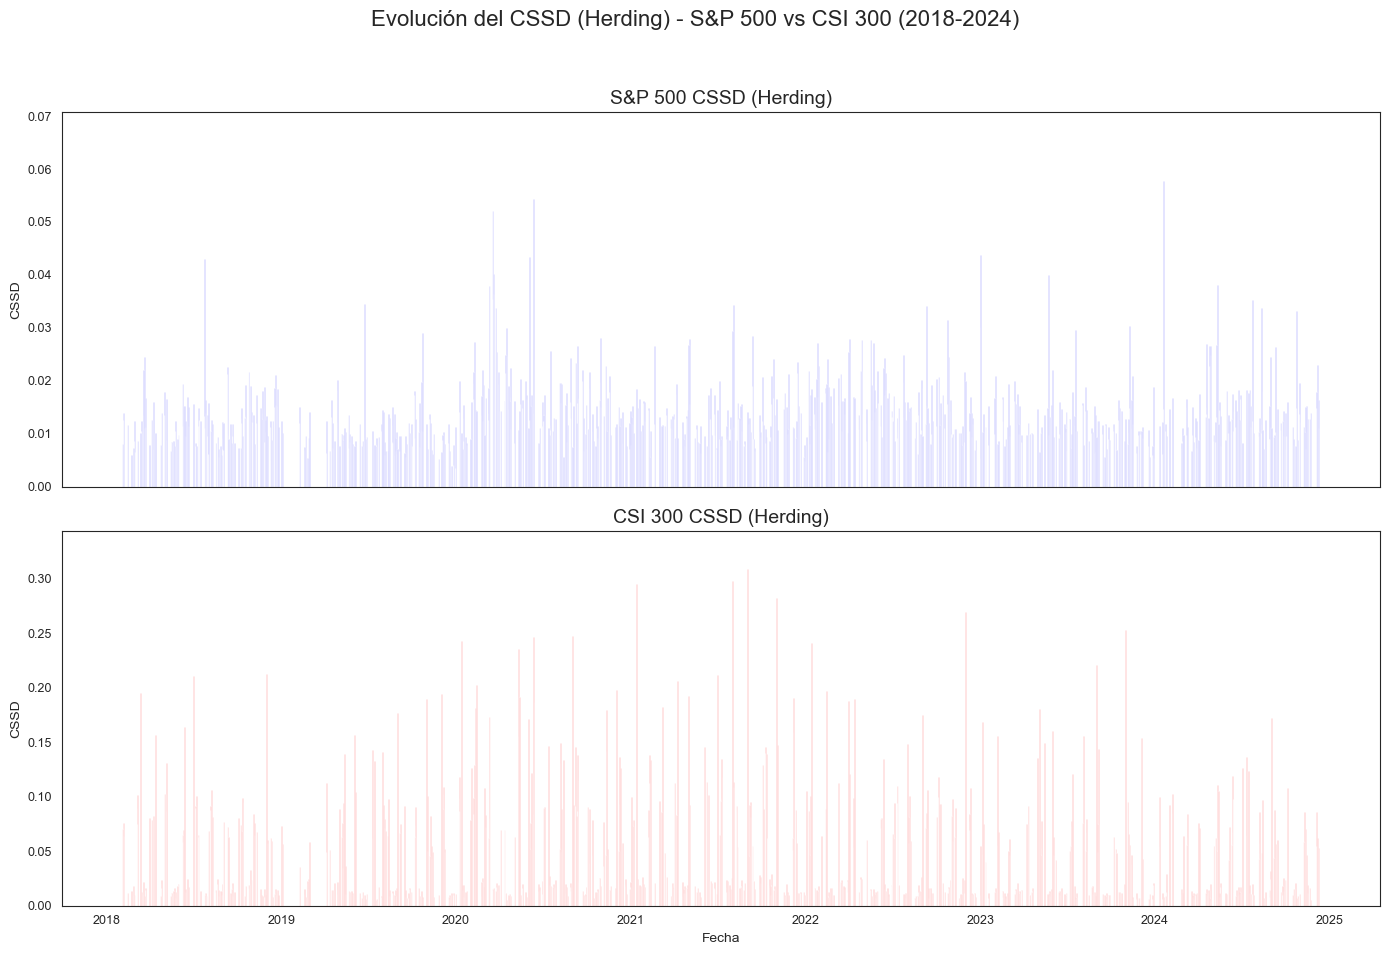

Gráfico CSSD_Bars_Comparison.png generado y mostrado.


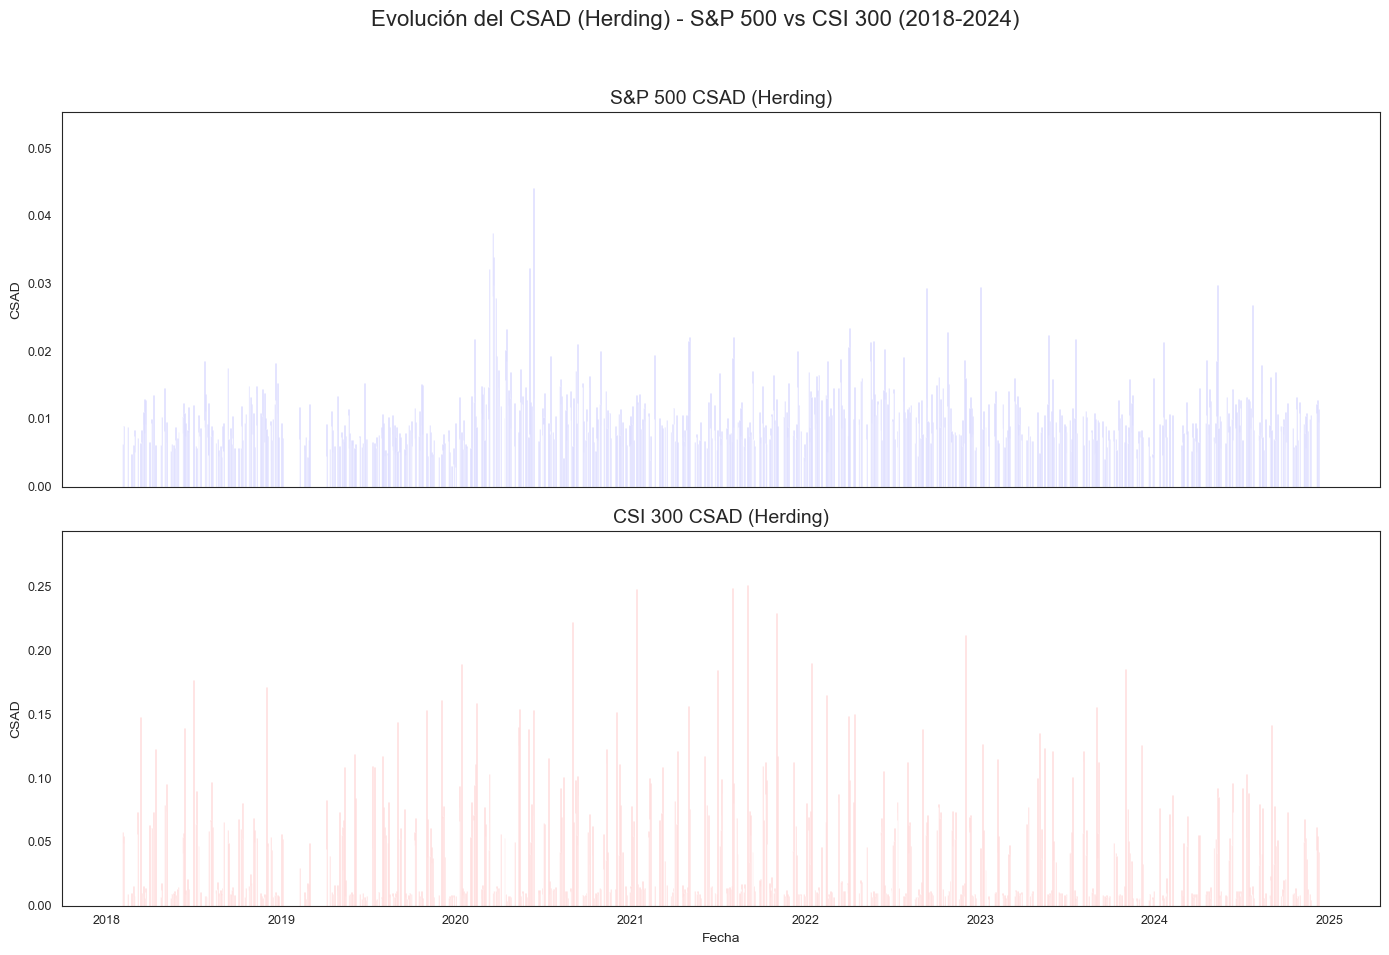

Gráfico CSAD_Bars_Comparison.png generado y mostrado.


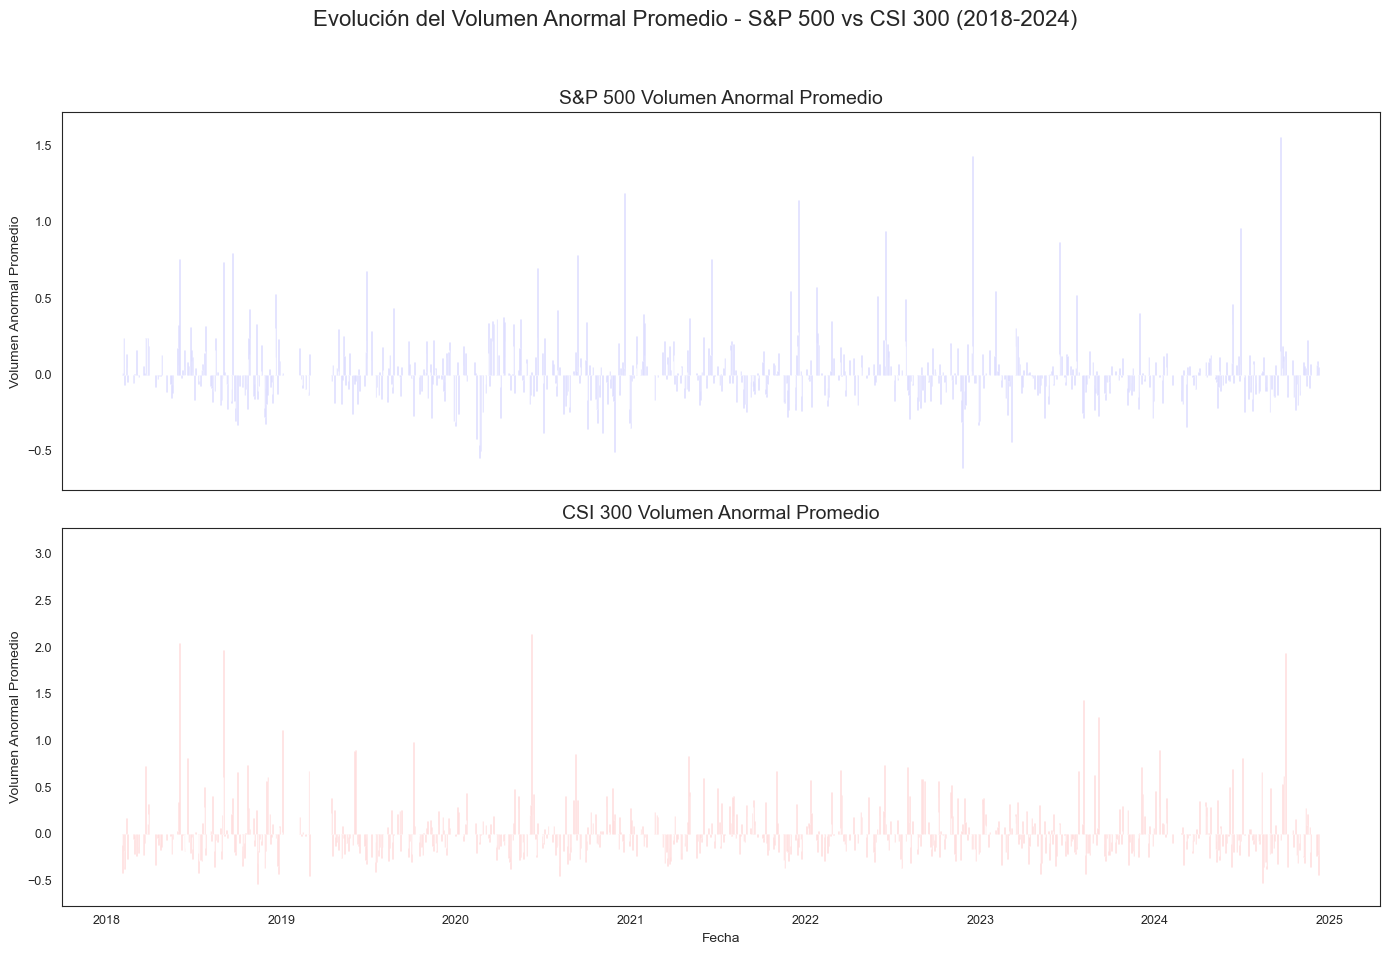

Gráfico Abnormal_Volume_Bars_Comparison.png generado y mostrado.


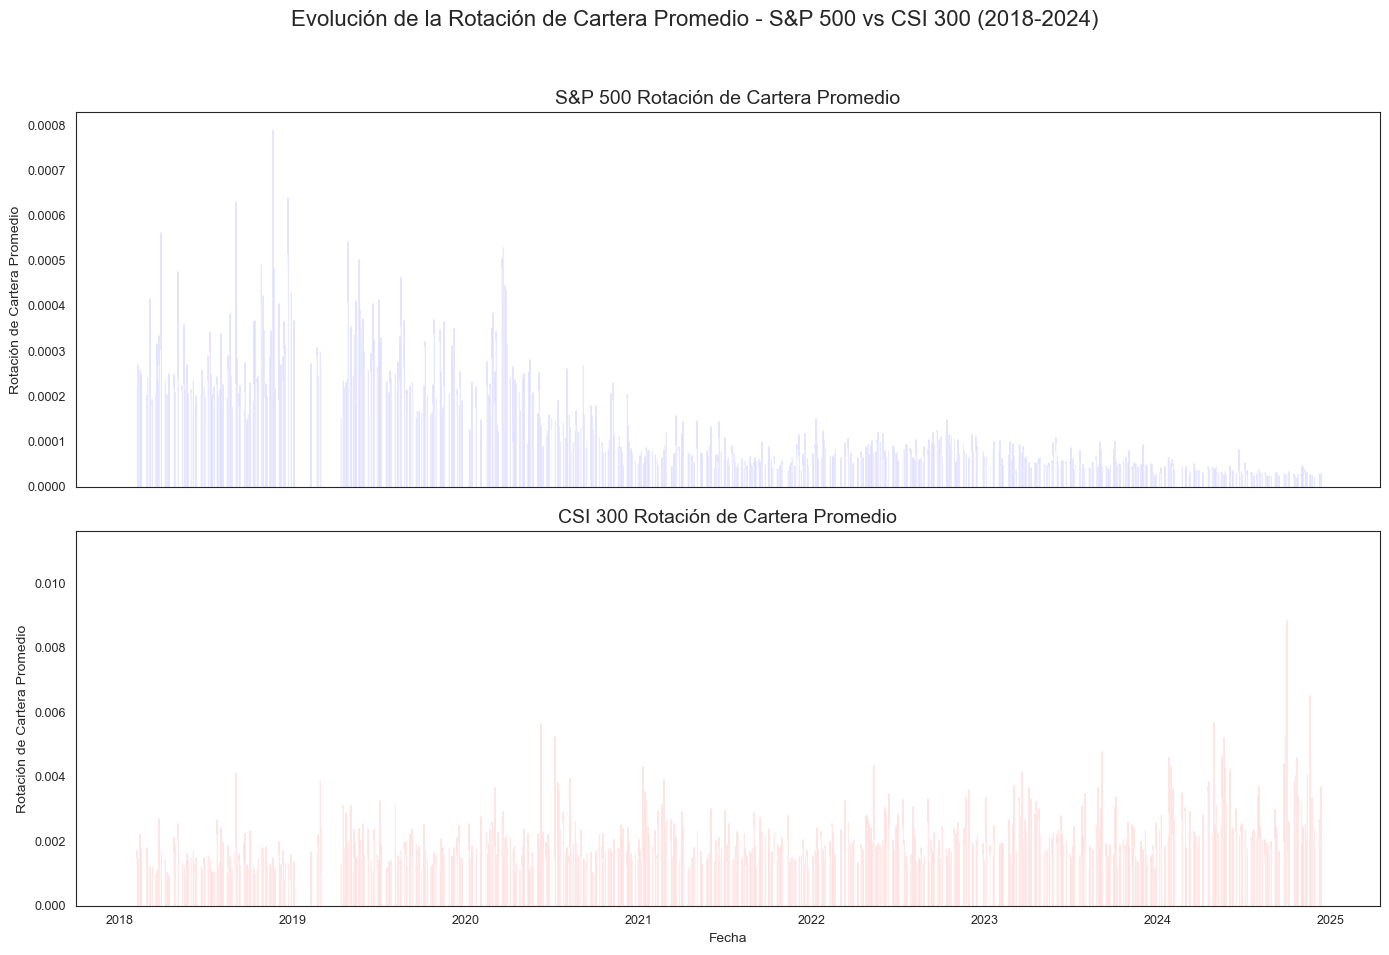

Gráfico Turnover_Bars_Comparison.png generado y mostrado.

Visualización gráfica de los sesgos completada. Los gráficos se han guardado como archivos PNG.


In [54]:
# --- PASO 13.1: VISUALIZACIÓN GRÁFICA DE LOS SESGOS (EVOLUCIÓN TEMPORAL - GRÁFICOS DE BARRAS) ---

print("Iniciando visualización gráfica de los sesgos (gráficos de barras)...")

import matplotlib.pyplot as plt
import seaborn as sns 

plt.rcParams.update({'font.size': 10})
sns.set_style("white") # Fondo blanco
plt.rc('axes', linewidth=0.8) # Líneas de ejes más visibles
plt.rc('lines', linewidth=2.5) # Aunque no se usen líneas, es una configuración general
plt.rc('xtick', labelsize=9) 
plt.rc('ytick', labelsize=9) 

# --- Graficar CSSD (Barras) ---
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True) # 2 filas, 1 columna, comparten eje X
axes[0].bar(df_sp500_aligned.index, df_sp500_aligned['CSSD_SP500'], color='blue', alpha=0.7, width=0.8)
axes[0].set_title('S&P 500 CSSD (Herding)')
axes[0].set_ylabel('CSSD')
axes[0].grid(False) # Sin grilla

axes[1].bar(df_csi300_aligned.index, df_csi300_aligned['CSSD_CSI300'], color='red', alpha=0.7, width=0.8)
axes[1].set_title('CSI 300 CSSD (Herding)')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('CSSD')
axes[1].grid(False) # Sin grilla

fig.suptitle('Evolución del CSSD (Herding) - S&P 500 vs CSI 300 (2018-2024)', fontsize=16, y=0.98) # Título general
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el layout, dejando espacio para el título principal
plt.savefig('CSSD_Bars_Comparison.png')
plt.show() 
plt.close()

print("Gráfico CSSD_Bars_Comparison.png generado y mostrado.")


# --- Graficar CSAD (Barras) ---
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axes[0].bar(df_sp500_aligned.index, df_sp500_aligned['CSAD_SP500'], color='blue', alpha=0.7, width=0.8)
axes[0].set_title('S&P 500 CSAD (Herding)')
axes[0].set_ylabel('CSAD')
axes[0].grid(False)

axes[1].bar(df_csi300_aligned.index, df_csi300_aligned['CSAD_CSI300'], color='red', alpha=0.7, width=0.8)
axes[1].set_title('CSI 300 CSAD (Herding)')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('CSAD')
axes[1].grid(False)

fig.suptitle('Evolución del CSAD (Herding) - S&P 500 vs CSI 300 (2018-2024)', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('CSAD_Bars_Comparison.png')
plt.show() 
plt.close()

print("Gráfico CSAD_Bars_Comparison.png generado y mostrado.")


# --- Graficar Volumen Anormal Promedio (Barras) ---
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axes[0].bar(df_sp500_aligned.index, df_sp500_aligned['Index_Abnormal_Volume_Avg'], color='blue', alpha=0.7, width=0.8)
axes[0].set_title('S&P 500 Volumen Anormal Promedio')
axes[0].set_ylabel('Volumen Anormal Promedio')
axes[0].grid(False)

axes[1].bar(df_csi300_aligned.index, df_csi300_aligned['Index_Abnormal_Volume_Avg'], color='red', alpha=0.7, width=0.8)
axes[1].set_title('CSI 300 Volumen Anormal Promedio')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Volumen Anormal Promedio')
axes[1].grid(False)

fig.suptitle('Evolución del Volumen Anormal Promedio - S&P 500 vs CSI 300 (2018-2024)', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Abnormal_Volume_Bars_Comparison.png')
plt.show() 
plt.close()

print("Gráfico Abnormal_Volume_Bars_Comparison.png generado y mostrado.")


# --- Graficar Rotación de Cartera Promedio (Barras) ---
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axes[0].bar(df_sp500_aligned.index, df_sp500_aligned['Index_Turnover_Avg'], color='blue', alpha=0.7, width=0.8)
axes[0].set_title('S&P 500 Rotación de Cartera Promedio')
axes[0].set_ylabel('Rotación de Cartera Promedio')
axes[0].grid(False)

axes[1].bar(df_csi300_aligned.index, df_csi300_aligned['Index_Turnover_Avg'], color='red', alpha=0.7, width=0.8)
axes[1].set_title('CSI 300 Rotación de Cartera Promedio')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Rotación de Cartera Promedio')
axes[1].grid(False)

fig.suptitle('Evolución de la Rotación de Cartera Promedio - S&P 500 vs CSI 300 (2018-2024)', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Turnover_Bars_Comparison.png')
plt.show() 
plt.close()

print("Gráfico Turnover_Bars_Comparison.png generado y mostrado.")

print("\nVisualización gráfica de los sesgos completada. Los gráficos se han guardado como archivos PNG.")

Exportando tablas de estadísticas descriptivas como imágenes PNG...


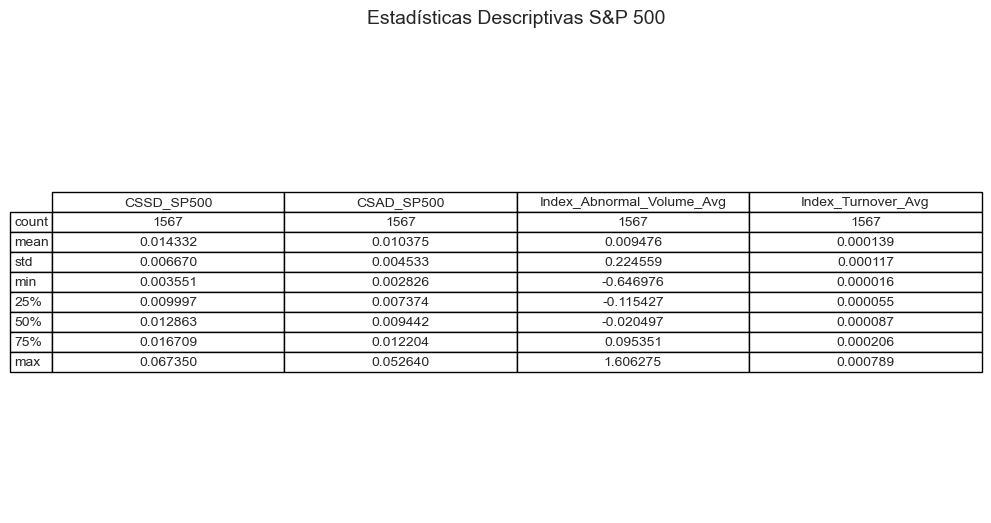

Tabla 'SP500_Descriptive_Stats.png' generada y mostrada.


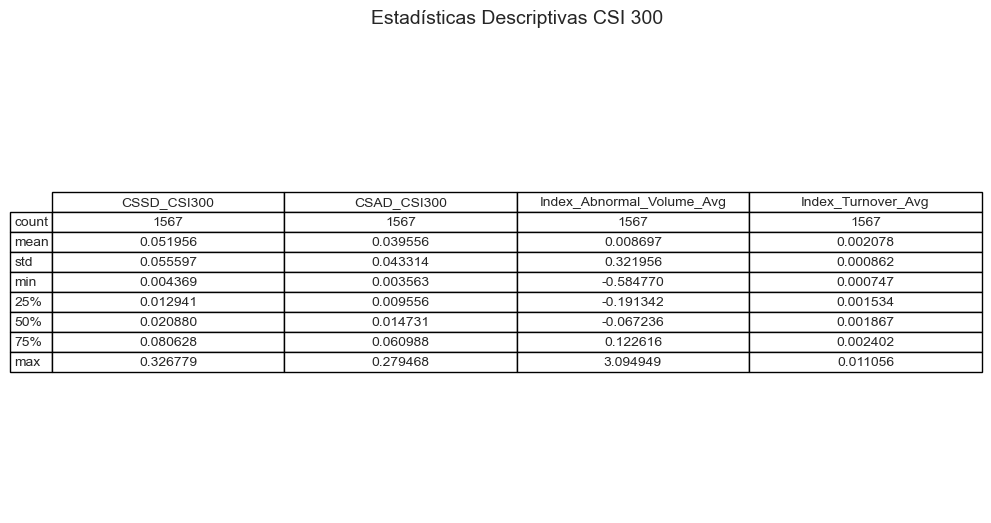

Tabla 'CSI300_Descriptive_Stats.png' generada y mostrada.

Exportación de tablas descriptivas como imágenes PNG completada.


In [77]:
# --- PASO 13.2: EXPORTAR TABLAS DESCRIPTIVAS COMO IMÁGENES (¡CON FORMATO FIJO DE DECIMALES Y ENTEROS!) ---

print("Exportando tablas de estadísticas descriptivas como imágenes PNG...")

# Asegúrate de que matplotlib y pandas estén importados
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np # Necesario para np.issubdtype

# --- Función de ayuda para guardar DataFrames como imágenes (¡AHORA CON FORMATO FIJO DE FLOAT Y COUNT ENTERO!) ---
def save_dataframe_as_image(df, filename, title=""):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off') # Ocultar los ejes para que solo se vea la tabla
    ax.axis('tight') # Ajustar la tabla al tamaño de los datos

    cell_text = []
    # Usamos .iterrows() para obtener el índice de la fila (row_label) y los datos de la fila (row_data)
    for row_label, row_data in df.iterrows(): 
        current_row_text = []
        for col_name, cell_value in row_data.items():
            if row_label == 'count': # <-- CAMBIO CLAVE AQUÍ: Si la fila es 'count'
                current_row_text.append(f"{int(cell_value)}") # Formatear como entero
            elif pd.api.types.is_float_dtype(df[col_name]): # Si es un tipo flotante (otras estadísticas)
                current_row_text.append(f"{cell_value:.6f}") # Formatear a 6 decimales fijos
            else:
                current_row_text.append(str(cell_value)) # Convertir otros tipos (como string) a string
        cell_text.append(current_row_text)

    # Renderizar el DataFrame como una tabla de matplotlib
    table = ax.table(cellText=cell_text, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='center')

    # Ajustar el tamaño de fuente y la escala de la tabla
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2) # Escala para ajustar mejor el espacio y la legibilidad

    if title:
        ax.set_title(title, fontsize=14, pad=20) # Añadir un título encima de la tabla

    # Guardar la figura como un archivo PNG
    plt.savefig(filename, bbox_inches='tight', dpi=300) # dpi=300 para alta resolución
    plt.show() # Mostrar la figura en el output de JupyterLab
    plt.close() # Cerrar la figura para liberar memoria y evitar que se muestre dos veces

# --- Generar las estadísticas descriptivas (copiado del Paso 13) ---
# Asegúrate de que df_sp500_aligned y df_csi300_aligned existan del Paso 12.
sesgos_cols_sp500 = ['CSSD_SP500', 'CSAD_SP500', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
existing_sesgos_sp500 = [col for col in sesgos_cols_sp500 if col in df_sp500_aligned.columns]

sesgos_cols_csi300 = ['CSSD_CSI300', 'CSAD_CSI300', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
existing_sesgos_csi300 = [col for col in sesgos_cols_csi300 if col in df_csi300_aligned.columns]

# Calcular las estadísticas descriptivas (Paso 13)
desc_stats_sp500 = df_sp500_aligned[existing_sesgos_sp500].describe()
desc_stats_csi300 = df_csi300_aligned[existing_sesgos_csi300].describe()

# NOTA: El redondeo (.round(6)) ya está hecho antes de pasar a la función.
desc_stats_sp500 = desc_stats_sp500.round(6) 
desc_stats_csi300 = desc_stats_csi300.round(6)

# --- Exportar y mostrar la tabla de S&P 500 ---
save_dataframe_as_image(desc_stats_sp500, 'SP500_Descriptive_Stats.png', 'Estadísticas Descriptivas S&P 500')
print("Tabla 'SP500_Descriptive_Stats.png' generada y mostrada.")

# --- Exportar y mostrar la tabla de CSI 300 ---
save_dataframe_as_image(desc_stats_csi300, 'CSI300_Descriptive_Stats.png', 'Estadísticas Descriptivas CSI 300')
print("Tabla 'CSI300_Descriptive_Stats.png' generada y mostrada.")

print("\nExportación de tablas descriptivas como imágenes PNG completada.")

In [55]:
# --- PASO 14: ANÁLISIS DE CORRELACIÓN DE LOS SESGOS ---

print("Iniciando cálculo de la matriz de correlación para los sesgos...")

# Columnas de sesgos principales para S&P 500 (ya filtradas por existencia en pasos anteriores)
sesgos_cols_sp500 = ['CSSD_SP500', 'CSAD_SP500', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
existing_sesgos_sp500 = [col for col in sesgos_cols_sp500 if col in df_sp500_aligned.columns]

# Columnas de sesgos principales para CSI 300 (ya filtradas por existencia en pasos anteriores)
sesgos_cols_csi300 = ['CSSD_CSI300', 'CSAD_CSI300', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
existing_sesgos_csi300 = [col for col in sesgos_cols_csi300 if col in df_csi300_aligned.columns]

print("\n--- Matriz de Correlación para S&P 500 ---")
correlation_matrix_sp500 = df_sp500_aligned[existing_sesgos_sp500].corr()
print(correlation_matrix_sp500)

print("\n--- Matriz de Correlación para CSI 300 ---")
correlation_matrix_csi300 = df_csi300_aligned[existing_sesgos_csi300].corr()
print(correlation_matrix_csi300)

print("\n¡Análisis de correlación de los sesgos completado!")

Iniciando cálculo de la matriz de correlación para los sesgos...

--- Matriz de Correlación para S&P 500 ---
                           CSSD_SP500  CSAD_SP500  Index_Abnormal_Volume_Avg  \
CSSD_SP500                   1.000000    0.932807                   0.152900   
CSAD_SP500                   0.932807    1.000000                   0.180852   
Index_Abnormal_Volume_Avg    0.152900    0.180852                   1.000000   
Index_Turnover_Avg           0.065887    0.092756                   0.188342   

                           Index_Turnover_Avg  
CSSD_SP500                           0.065887  
CSAD_SP500                           0.092756  
Index_Abnormal_Volume_Avg            0.188342  
Index_Turnover_Avg                   1.000000  

--- Matriz de Correlación para CSI 300 ---
                           CSSD_CSI300  CSAD_CSI300  \
CSSD_CSI300                   1.000000     0.992523   
CSAD_CSI300                   0.992523     1.000000   
Index_Abnormal_Volume_Avg     0.275397   

Exportando tablas de correlación como imágenes PNG (formato limpio)...

--- Exportando tablas de correlación ---


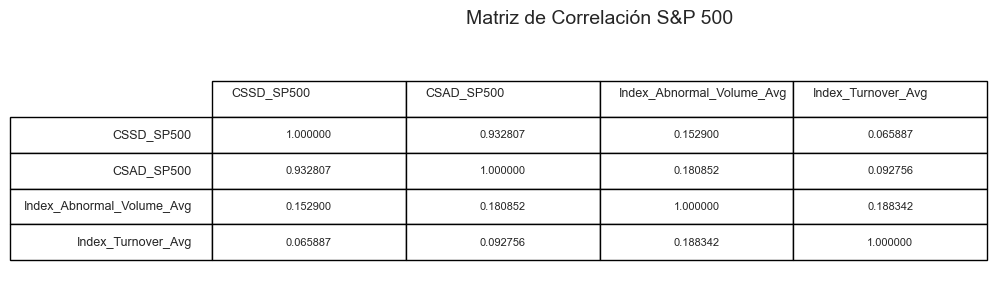

Tabla 'SP500_Correlation_Matrix.png' generada y mostrada.


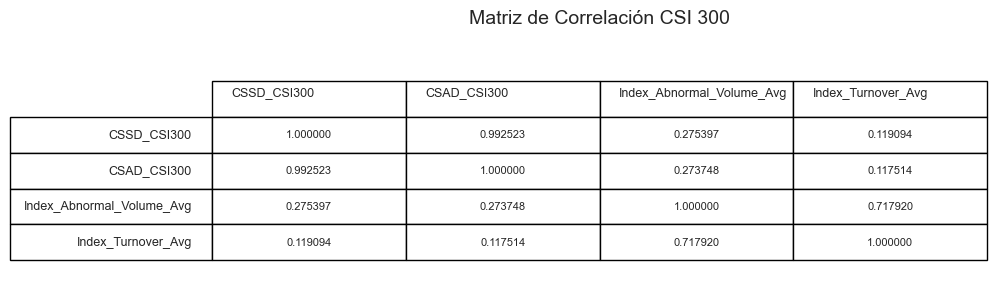

Tabla 'CSI300_Correlation_Matrix.png' generada y mostrada.

Exportación de tablas de correlación como imágenes PNG completada.


In [87]:
# --- PASO 14.1: EXPORTAR TABLAS DE CORRELACIÓN COMO IMÁGENES ---

print("Exportando tablas de correlación como imágenes PNG (formato limpio)...")

import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import numpy as np 

# --- Función de ayuda para guardar DataFrames como imágenes (VERSION ROBUSTA Y LEGIBLE) ---
def save_dataframe_as_image(df, filename, title=""):
    fig, ax = plt.subplots(figsize=(10, df.shape[0] * 0.4 + 1.5)) # Tamaño de figura adaptable
    ax.axis('off') # Ocultar ejes
    ax.axis('tight') # Ajustar la tabla al tamaño de los datos

    cell_text = []
    for row_label, row_data in df.iterrows(): 
        current_row_text = []
        for col_name, cell_value in row_data.items():
            if row_label == 'count': # Aunque no tendremos 'count' en tablas de correlación
                 current_row_text.append(f"{int(cell_value)}")
            elif pd.api.types.is_float_dtype(df[col_name]):
                current_row_text.append(f"{cell_value:.6f}") # Formatear a 6 decimales fijos para datos (correlación)
            else:
                current_row_text.append(str(cell_value)) 
        cell_text.append(current_row_text)

    num_cols = df.shape[1]
    col_widths = [1.0 / num_cols] * num_cols # Ancho uniforme
    
    table = ax.table(cellText=cell_text, 
                     colLabels=df.columns, # Asume que las columnas ya vienen renombradas y abreviadas
                     rowLabels=[str(idx) for idx in df.index], # Convertir a string explícitamente
                     loc='center', 
                     cellLoc='center', 
                     colWidths=col_widths) 

    # --- Configuración para los encabezados de columna y fila (rotación, alineación, fuente) ---
    for (row, col), cell in table.get_celld().items():
        cell.set_height(0.15) # Ajustar altura de cada celda

        if row == 0: # Encabezados de columna
            cell.set_text_props(rotation=0, ha='left', va='bottom') # Rotación 45, alinear a la izquierda/abajo
            cell.set_fontsize(9) # Fuente para el encabezado
        if col == -1: # Etiquetas de fila (nombres del índice)
            cell.set_text_props(ha='right', va='center') # Alinear a la derecha y centrado verticalmente
            cell.set_fontsize(9) # Fuente para row labels
        if row > 0 and col >= 0: # Datos de las celdas
            cell.set_fontsize(8) # Fuente para los números de la tabla

    table.auto_set_font_size(False)
    table.scale(1.0, 1.0) 

    if title:
        ax.set_title(title, fontsize=14, pad=20) 

    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show() 
    plt.close()


# --- Asegurarse de que las matrices de correlación estén disponibles (del Paso 14) ---
# df_sp500_aligned y df_csi300_aligned deben estar definidos desde el Paso 12
# Las variables correlation_matrix_sp500 y correlation_matrix_csi300 deben venir del Paso 14
# Si no las tienes, ejecuta el Paso 14 justo antes de este.

# Columnas de sesgos principales (re-definimos para asegurar consistencia)
sesgos_cols_sp500 = ['CSSD_SP500', 'CSAD_SP500', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
existing_sesgos_sp500 = [col for col in sesgos_cols_sp500 if col in df_sp500_aligned.columns]

sesgos_cols_csi300 = ['CSSD_CSI300', 'CSAD_CSI300', 'Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg']
existing_sesgos_csi300 = [col for col in sesgos_cols_csi300 if col in df_csi300_aligned.columns]

# Recalcular las matrices de correlación para asegurar que estén listas y formateadas
correlation_matrix_sp500 = df_sp500_aligned[existing_sesgos_sp500].corr().round(6)
correlation_matrix_csi300 = df_csi300_aligned[existing_sesgos_csi300].corr().round(6)


# --- Exportar y mostrar las tablas de correlación ---
print("\n--- Exportando tablas de correlación ---")

save_dataframe_as_image(correlation_matrix_sp500, 'SP500_Correlation_Matrix.png', 'Matriz de Correlación S&P 500')
print("Tabla 'SP500_Correlation_Matrix.png' generada y mostrada.")

save_dataframe_as_image(correlation_matrix_csi300, 'CSI300_Correlation_Matrix.png', 'Matriz de Correlación CSI 300')
print("Tabla 'CSI300_Correlation_Matrix.png' generada y mostrada.")

print("\nExportación de tablas de correlación como imágenes PNG completada.")

In [73]:
# --- PASO 15: ANÁLISIS ECONOMÉTRICO - REGRESIONES PARA HERDING ---

import statsmodels.api as sm # Importar la librería para modelos estadísticos

print("Iniciando Análisis Econométrico: Regresiones para Herding...")

# Preparar variables para S&P 500
# Crear una copia para evitar SettingWithCopyWarning y asegurar que solo tengamos las columnas necesarias
df_sp500_reg = df_sp500_aligned[['CSSD_SP500', 'CSAD_SP500', 'Index_Daily_Return_Avg']].copy()
df_sp500_reg['RM_Abs'] = df_sp500_reg['Index_Daily_Return_Avg'].abs() # Valor absoluto del retorno del mercado
df_sp500_reg['RM_Sq'] = df_sp500_reg['Index_Daily_Return_Avg']**2 # Retorno del mercado al cuadrado
# Eliminar cualquier fila con NaN en estas columnas para la regresión
df_sp500_reg.dropna(subset=['CSSD_SP500', 'CSAD_SP500', 'RM_Abs', 'RM_Sq'], inplace=True) 

# Preparar variables para CSI 300
df_csi300_reg = df_csi300_aligned[['CSSD_CSI300', 'CSAD_CSI300', 'Index_Daily_Return_Avg']].copy()
df_csi300_reg['RM_Abs'] = df_csi300_reg['Index_Daily_Return_Avg'].abs()
df_csi300_reg['RM_Sq'] = df_csi300_reg['Index_Daily_Return_Avg']**2
df_csi300_reg.dropna(subset=['CSSD_CSI300', 'CSAD_CSI300', 'RM_Abs', 'RM_Sq'], inplace=True)

# Añadir una constante a los modelos (esto es para el término intercepto 'alpha')
df_sp500_reg = sm.add_constant(df_sp500_reg)
df_csi300_reg = sm.add_constant(df_csi300_reg)


# --- Regresiones para S&P 500 ---
print("\n--- Regresión de Herding (CSSD) para S&P 500 ---")
# Definir el modelo OLS (Ordinary Least Squares - Mínimos Cuadrados Ordinarios)
# La variable dependiente es CSSD_SP500, las independientes son const, RM_Abs, RM_Sq
model_sp500_cssd = sm.OLS(df_sp500_reg['CSSD_SP500'], df_sp500_reg[['const', 'RM_Abs', 'RM_Sq']])
results_sp500_cssd = model_sp500_cssd.fit() # Ajustar el modelo
print(results_sp500_cssd.summary()) # Imprimir el resumen de los resultados

print("\n--- Regresión de Herding (CSAD) para S&P 500 ---")
model_sp500_csad = sm.OLS(df_sp500_reg['CSAD_SP500'], df_sp500_reg[['const', 'RM_Abs', 'RM_Sq']])
results_sp500_csad = model_sp500_csad.fit()
print(results_sp500_csad.summary())


# --- Regresiones para CSI 300 ---
print("\n--- Regresión de Herding (CSSD) para CSI 300 ---")
model_csi300_cssd = sm.OLS(df_csi300_reg['CSSD_CSI300'], df_csi300_reg[['const', 'RM_Abs', 'RM_Sq']])
results_csi300_cssd = model_csi300_cssd.fit()
print(results_csi300_cssd.summary())

print("\n--- Regresión de Herding (CSAD) para CSI 300 ---")
model_csi300_csad = sm.OLS(df_csi300_reg['CSAD_CSI300'], df_csi300_reg[['const', 'RM_Abs', 'RM_Sq']])
results_csi300_csad = model_csi300_csad.fit()
print(results_csi300_csad.summary())

print("\nAnálisis Econométrico para Herding completado. Revisa los coeficientes de RM_Sq.")

Iniciando Análisis Econométrico: Regresiones para Herding...

--- Regresión de Herding (CSSD) para S&P 500 ---
                            OLS Regression Results                            
Dep. Variable:             CSSD_SP500   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           7.69e-78
Time:                        18:16:08   Log-Likelihood:                 5805.7
No. Observations:                1567   AIC:                        -1.161e+04
Df Residuals:                    1564   BIC:                        -1.159e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [74]:
# --- PASO 16: ANÁLISIS ECONOMÉTRICO - REGRESIONES PARA VOLUMEN ANORMAL Y ROTACIÓN DE CARTERA ---

print("Iniciando Análisis Econométrico: Regresiones para Volumen Anormal y Rotación de Cartera...")

# --- Preparar variables comunes para ambos DataFrames ---
# Retorno Absoluto del Mercado y Cuadrado del Retorno (ya calculados en Paso 15, pero nos aseguramos)
df_sp500_reg_activity = df_sp500_aligned[['Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg', 'Index_Daily_Return_Avg']].copy()
df_csi300_reg_activity = df_csi300_aligned[['Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg', 'Index_Daily_Return_Avg']].copy()

df_sp500_reg_activity['RM_Abs'] = df_sp500_reg_activity['Index_Daily_Return_Avg'].abs()
df_sp500_reg_activity['RM_Sq'] = df_sp500_reg_activity['Index_Daily_Return_Avg']**2

df_csi300_reg_activity['RM_Abs'] = df_csi300_reg_activity['Index_Daily_Return_Avg'].abs()
df_csi300_reg_activity['RM_Sq'] = df_csi300_reg_activity['Index_Daily_Return_Avg']**2

# Añadir una constante (intercepto)
df_sp500_reg_activity = sm.add_constant(df_sp500_reg_activity)
df_csi300_reg_activity = sm.add_constant(df_csi300_reg_activity)

# Eliminar NaN para las regresiones
df_sp500_reg_activity.dropna(subset=['Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg', 'RM_Abs', 'RM_Sq'], inplace=True)
df_csi300_reg_activity.dropna(subset=['Index_Abnormal_Volume_Avg', 'Index_Turnover_Avg', 'RM_Abs', 'RM_Sq'], inplace=True)


# --- Regresiones para S&P 500 ---
print("\n--- Regresión: Volumen Anormal Promedio para S&P 500 ---")
model_sp500_abnormal_vol = sm.OLS(df_sp500_reg_activity['Index_Abnormal_Volume_Avg'], df_sp500_reg_activity[['const', 'RM_Abs', 'RM_Sq']])
results_sp500_abnormal_vol = model_sp500_abnormal_vol.fit()
print(results_sp500_abnormal_vol.summary())

print("\n--- Regresión: Rotación de Cartera Promedio para S&P 500 ---")
model_sp500_turnover = sm.OLS(df_sp500_reg_activity['Index_Turnover_Avg'], df_sp500_reg_activity[['const', 'RM_Abs', 'RM_Sq']])
results_sp500_turnover = model_sp500_turnover.fit()
print(results_sp500_turnover.summary())


# --- Regresiones para CSI 300 ---
print("\n--- Regresión: Volumen Anormal Promedio para CSI 300 ---")
model_csi300_abnormal_vol = sm.OLS(df_csi300_reg_activity['Index_Abnormal_Volume_Avg'], df_csi300_reg_activity[['const', 'RM_Abs', 'RM_Sq']])
results_csi300_abnormal_vol = model_csi300_abnormal_vol.fit()
print(results_csi300_abnormal_vol.summary())

print("\n--- Regresión: Rotación de Cartera Promedio para CSI 300 ---")
model_csi300_turnover = sm.OLS(df_csi300_reg_activity['Index_Turnover_Avg'], df_csi300_reg_activity[['const', 'RM_Abs', 'RM_Sq']])
results_csi300_turnover = model_csi300_turnover.fit()
print(results_csi300_turnover.summary())

print("\nAnálisis Econométrico para Volumen Anormal y Rotación de Cartera completado.")

Iniciando Análisis Econométrico: Regresiones para Volumen Anormal y Rotación de Cartera...

--- Regresión: Volumen Anormal Promedio para S&P 500 ---
                                OLS Regression Results                               
Dep. Variable:     Index_Abnormal_Volume_Avg   R-squared:                       0.011
Model:                                   OLS   Adj. R-squared:                  0.009
Method:                        Least Squares   F-statistic:                     8.333
Date:                       Thu, 03 Jul 2025   Prob (F-statistic):           0.000251
Time:                               18:16:10   Log-Likelihood:                 125.83
No. Observations:                       1567   AIC:                            -245.7
Df Residuals:                           1564   BIC:                            -229.6
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                 

Exportando tablas de regresión como imágenes PNG...

--- Exportando tablas de regresión ---

DEBUG: DataFrame para SP500_CSSD_Regression:
          coef  std err        t   P>|t|  [0.025  0.975]
const   0.0118   0.0002  51.5707  0.0000  0.0113  0.0122
RM_Abs  0.3214   0.0271  11.8692  0.0000  0.2683  0.3746
RM_Sq  -0.1163   0.3694  -0.3149  0.7529 -0.8409  0.6083


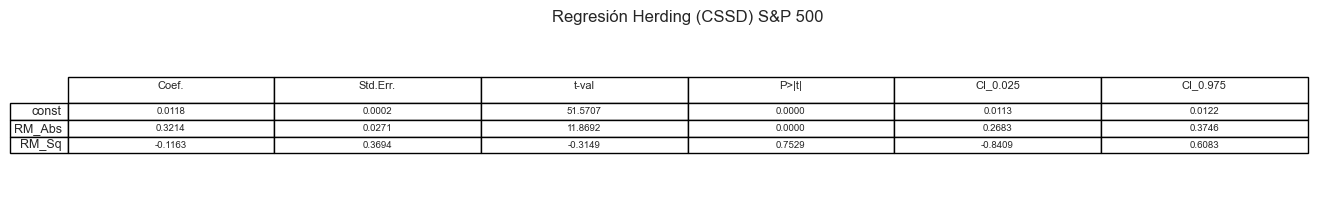

Tabla 'SP500_CSSD_Regression.png' generada y mostrada.

DEBUG: DataFrame para SP500_CSAD_Regression:
          coef  std err        t   P>|t|  [0.025  0.975]
const   0.0084   0.0001  57.3633  0.0000  0.0081  0.0087
RM_Abs  0.2450   0.0173  14.1341  0.0000  0.2110  0.2790
RM_Sq   0.1944   0.2364   0.8220  0.4112 -0.2694  0.6582


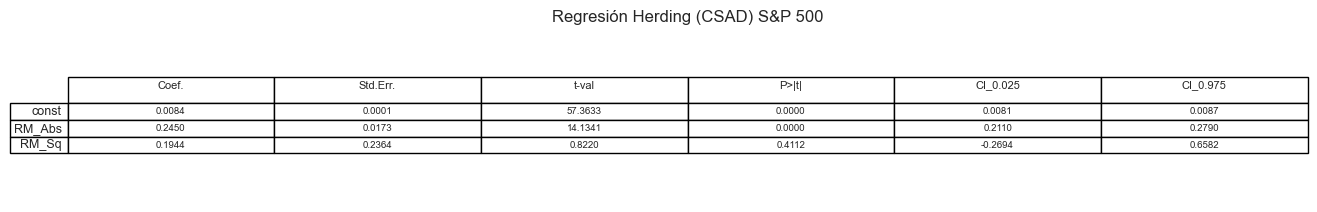

Tabla 'SP500_CSAD_Regression.png' generada y mostrada.

DEBUG: DataFrame para CSI300_CSSD_Regression:
          coef  std err        t  P>|t|  [0.025  0.975]
const   0.0191   0.0013  14.7686    0.0  0.0166  0.0216
RM_Abs  1.4514   0.0537  27.0258    0.0  1.3461  1.5568
RM_Sq  -2.6404   0.2797  -9.4388    0.0 -3.1891 -2.0917


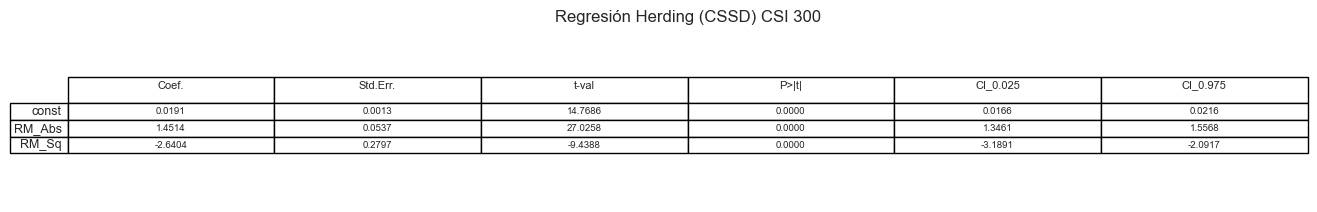

Tabla 'CSI300_CSSD_Regression.png' generada y mostrada.

DEBUG: DataFrame para CSI300_CSAD_Regression:
          coef  std err        t  P>|t|  [0.025  0.975]
const   0.0144   0.0010  14.5165    0.0  0.0125  0.0164
RM_Abs  1.0800   0.0413  26.1730    0.0  0.9991  1.1609
RM_Sq  -1.6794   0.2149  -7.8134    0.0 -2.1010 -1.2578


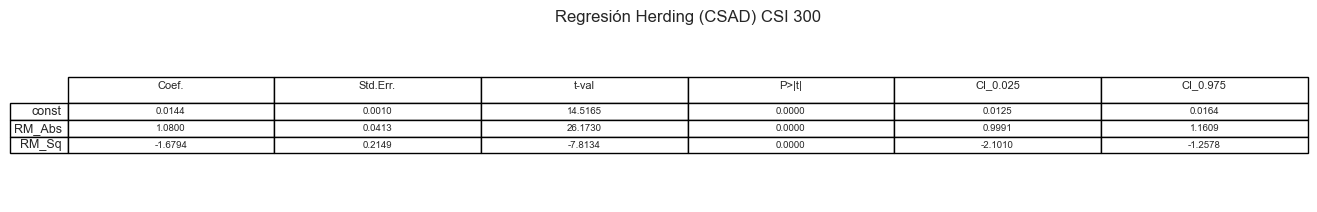

Tabla 'CSI300_CSAD_Regression.png' generada y mostrada.

DEBUG: DataFrame para SP500_AbnormalVol_Regression:
           coef  std err       t   P>|t|   [0.025   0.975]
const   -0.0142   0.0086 -1.6504  0.0991  -0.0310   0.0027
RM_Abs   3.2935   1.0159  3.2418  0.0012   1.3007   5.2862
RM_Sq  -16.5416  13.8579 -1.1937  0.2328 -43.7236  10.6404


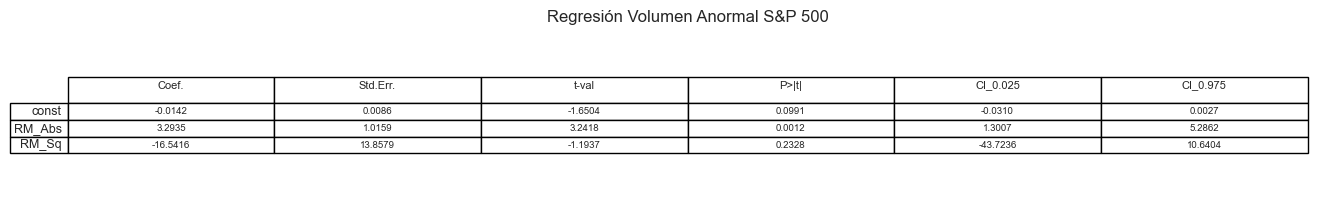

Tabla 'SP500_AbnormalVol_Regression.png' generada y mostrada.

DEBUG: DataFrame para SP500_Turnover_Regression:
          coef  std err        t   P>|t|  [0.025  0.975]
const   0.0001   0.0000  26.6331  0.0000  0.0001  0.0001
RM_Abs  0.0028   0.0005   5.4241  0.0000  0.0018  0.0038
RM_Sq   0.0018   0.0070   0.2614  0.7938 -0.0120  0.0157


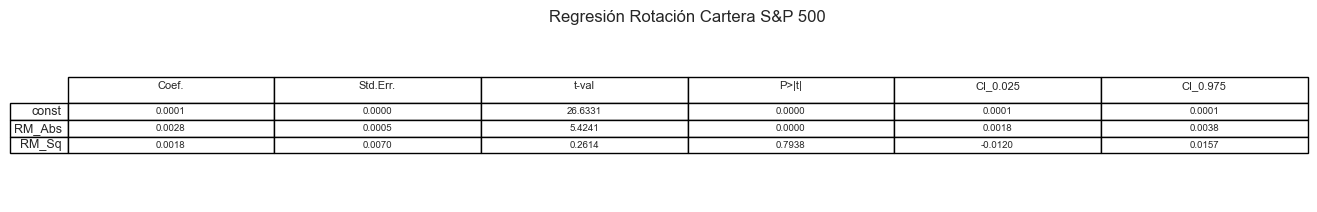

Tabla 'SP500_Turnover_Regression.png' generada y mostrada.

DEBUG: DataFrame para CSI300_AbnormalVol_Regression:
          coef  std err       t   P>|t|  [0.025  0.975]
const  -0.0766   0.0105 -7.2700  0.0000 -0.0973 -0.0559
RM_Abs  3.6221   0.4379  8.2722  0.0000  2.7632  4.4809
RM_Sq  -5.2217   2.2808 -2.2894  0.0222 -9.6954 -0.7480


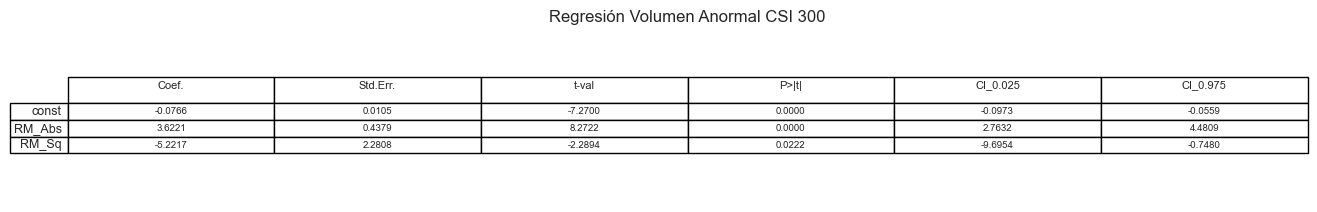

Tabla 'CSI300_AbnormalVol_Regression.png' generada y mostrada.

DEBUG: DataFrame para CSI300_Turnover_Regression:
          coef  std err        t   P>|t|  [0.025  0.975]
const   0.0019   0.0000  65.9396  0.0000  0.0019  0.0020
RM_Abs  0.0059   0.0012   4.8523  0.0000  0.0035  0.0083
RM_Sq  -0.0083   0.0064  -1.2985  0.1943 -0.0207  0.0042


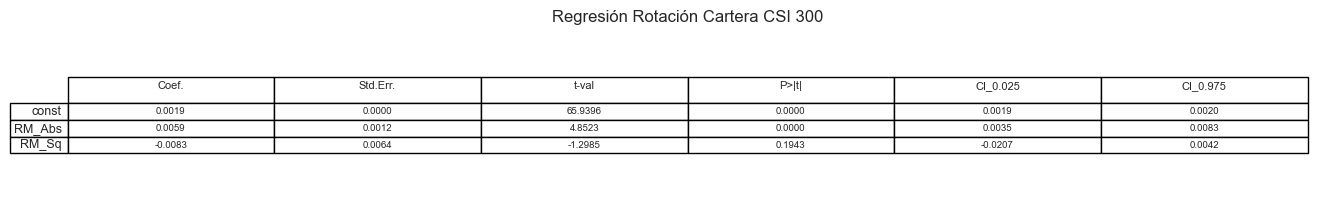

Tabla 'CSI300_Turnover_Regression.png' generada y mostrada.

Exportación de tablas de regresión como imágenes PNG completada.


In [88]:
# --- PASO 16.1: EXPORTAR TABLAS DE REGRESIÓN COMO IMÁGENES ---

print("Exportando tablas de regresión como imágenes PNG...")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def save_dataframe_as_image(df, filename, title=""):
    # ... (código de save_dataframe_as_image, no lo cambio para no hacer esto más largo) ...
    fig, ax = plt.subplots(figsize=(16, df.shape[0] * 0.35 + 1.2)) # Ancho: 16 (más ancho), Altura: Dinámica
    ax.axis('off')
    ax.axis('tight')

    cell_text = []
    for row_label, row_data in df.iterrows():
        current_row_text = []
        for col_name, cell_value in row_data.items():
            if pd.api.types.is_float_dtype(df[col_name]):
                current_row_text.append(f"{cell_value:.4f}")
            else:
                current_row_text.append(str(cell_value))
        cell_text.append(current_row_text)

    new_col_labels = {
        'coef': 'Coef.',
        'std err': 'Std.Err.',
        't': 't-val',
        'P>|t|': 'P>|t|',
        '[0.025': 'CI_0.025',
        '0.025': 'CI_0.025',
        '0.975]': 'CI_0.975',
        '0.975': 'CI_0.975'
    }
    current_cols = df.columns.tolist()
    display_col_labels = [new_col_labels.get(col, col) for col in current_cols]

    table = ax.table(cellText=cell_text,
                     colLabels=display_col_labels,
                     rowLabels=[str(idx) for idx in df.index],
                     loc='center',
                     cellLoc='center')

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(rotation=0, ha='center', va='bottom')
            cell.set_height(0.15)
            cell.set_fontsize(8)

        if col == -1:
            cell.set_text_props(ha='right', va='center')
            cell.set_fontsize(9)

        if row > 0 and col >= 0:
            cell.set_fontsize(7)

    table.auto_set_font_size(False)
    table.scale(1.0, 1.0)

    if title:
        ax.set_title(title, fontsize=12, pad=5)

    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    

def extract_regression_table_to_df(results_obj):
    try:
        df_coefs = pd.DataFrame({
            'coef': results_obj.params,
            'std err': results_obj.bse,
            't': results_obj.tvalues,
            'P>|t|': results_obj.pvalues
        })

        conf_int = results_obj.conf_int()
        df_coefs['[0.025'] = conf_int[0]
        df_coefs['0.975]'] = conf_int[1]

        relevant_rows = ['const', 'RM_Abs', 'RM_Sq']
        df_coefs = df_coefs.loc[df_coefs.index.intersection(relevant_rows)]

        return df_coefs.round(4)

    except Exception as e:
        print(f"Error extrayendo tabla de regresión de forma robusta para {results_obj.model.__class__.__name__}: {e}")
        return pd.DataFrame()


print("\n--- Exportando tablas de regresión ---")

# --- AÑADIR PRINTS DE DEPURACIÓN AQUÍ ---
df_reg_sp500_cssd = extract_regression_table_to_df(results_sp500_cssd)
print("\nDEBUG: DataFrame para SP500_CSSD_Regression:")
print(df_reg_sp500_cssd)
save_dataframe_as_image(df_reg_sp500_cssd, 'SP500_CSSD_Regression.png', 'Regresión Herding (CSSD) S&P 500')
print("Tabla 'SP500_CSSD_Regression.png' generada y mostrada.")

df_reg_sp500_csad = extract_regression_table_to_df(results_sp500_csad)
print("\nDEBUG: DataFrame para SP500_CSAD_Regression:")
print(df_reg_sp500_csad)
save_dataframe_as_image(df_reg_sp500_csad, 'SP500_CSAD_Regression.png', 'Regresión Herding (CSAD) S&P 500')
print("Tabla 'SP500_CSAD_Regression.png' generada y mostrada.")

df_reg_csi300_cssd = extract_regression_table_to_df(results_csi300_cssd)
print("\nDEBUG: DataFrame para CSI300_CSSD_Regression:")
print(df_reg_csi300_cssd)
save_dataframe_as_image(df_reg_csi300_cssd, 'CSI300_CSSD_Regression.png', 'Regresión Herding (CSSD) CSI 300')
print("Tabla 'CSI300_CSSD_Regression.png' generada y mostrada.")

df_reg_csi300_csad = extract_regression_table_to_df(results_csi300_csad)
print("\nDEBUG: DataFrame para CSI300_CSAD_Regression:")
print(df_reg_csi300_csad)
save_dataframe_as_image(df_reg_csi300_csad, 'CSI300_CSAD_Regression.png', 'Regresión Herding (CSAD) CSI 300')
print("Tabla 'CSI300_CSAD_Regression.png' generada y mostrada.")

df_reg_sp500_abnormal_vol = extract_regression_table_to_df(results_sp500_abnormal_vol)
print("\nDEBUG: DataFrame para SP500_AbnormalVol_Regression:")
print(df_reg_sp500_abnormal_vol)
save_dataframe_as_image(df_reg_sp500_abnormal_vol, 'SP500_AbnormalVol_Regression.png', 'Regresión Volumen Anormal S&P 500')
print("Tabla 'SP500_AbnormalVol_Regression.png' generada y mostrada.")

df_reg_sp500_turnover = extract_regression_table_to_df(results_sp500_turnover)
print("\nDEBUG: DataFrame para SP500_Turnover_Regression:")
print(df_reg_sp500_turnover)
save_dataframe_as_image(df_reg_sp500_turnover, 'SP500_Turnover_Regression.png', 'Regresión Rotación Cartera S&P 500')
print("Tabla 'SP500_Turnover_Regression.png' generada y mostrada.")

df_reg_csi300_abnormal_vol = extract_regression_table_to_df(results_csi300_abnormal_vol)
print("\nDEBUG: DataFrame para CSI300_AbnormalVol_Regression:")
print(df_reg_csi300_abnormal_vol)
save_dataframe_as_image(df_reg_csi300_abnormal_vol, 'CSI300_AbnormalVol_Regression.png', 'Regresión Volumen Anormal CSI 300')
print("Tabla 'CSI300_AbnormalVol_Regression.png' generada y mostrada.")

df_reg_csi300_turnover = extract_regression_table_to_df(results_csi300_turnover)
print("\nDEBUG: DataFrame para CSI300_Turnover_Regression:")
print(df_reg_csi300_turnover)
save_dataframe_as_image(extract_regression_table_to_df(results_csi300_turnover), 
                        'CSI300_Turnover_Regression.png', 'Regresión Rotación Cartera CSI 300')
print("Tabla 'CSI300_Turnover_Regression.png' generada y mostrada.")


print("\nExportación de tablas de regresión como imágenes PNG completada.")